Step 1: Import packages
===

- Numpy` is used for the vectors
- `scipy` is unused here, but is common
- `matpllotlib.pyplot` is used for plotting

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

Step 2: Problem description
===

Here you will set up the problem for
$$ u_t + c u_x = 0$$
with periodic BC on the interval [0,1]

In [2]:
c = 1.0
T = 1.0 / c # end time

Step 3: Set up the grid
===

dx will be the grid spacing in the $x$-direction

x will be the grid coordinates

xx will be really fine grid coordinates

In [3]:
nx = 82
x = np.linspace(0, 1, nx, endpoint=False)
dx = x[1] - x[0]
xx = np.linspace(0, 1, 1000, endpoint=False)

Now define an initial condition

In [4]:
def f(x):
    u = np.zeros(x.shape)
    u[np.intersect1d(np.where(x>0.4), np.where(x<0.6))] = 1.0
    return u

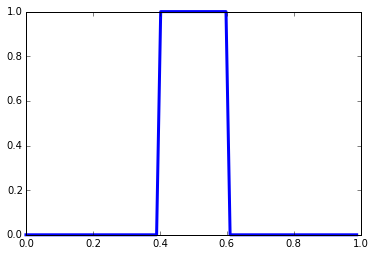

In [5]:
plt.plot(x, f(x), lw=3, clip_on=False)

Step 4: Setting dt
===

Now we need a time step.  Let
$$ \Delta t = \Delta x \frac{\lambda}{c}$$

So we need a parameter $\lambda$

<span style="color:red">What happens when $\lambda>1.0$?</span>

<span style="color:red">When the `method` changes to FTCS, what is the impact of $\lambda$?</span>

In [6]:
lmbda = 0.93
dt = dx * lmbda / c
nt = int(T/dt)
print('T = %g' % T)
print('tsteps = %d' % nt)
print('    dx = %g' % dx)
print('    dt = %g' % dt)
print('lambda = %g' % lmbda)

T = 1
tsteps = 88
    dx = 0.0121951
    dt = 0.0113415
lambda = 0.93


Now make an index list, called $J$, so that we can access $J+1$ and $J-1$ easily

In [7]:
J = np.arange(0, nx - 1)  # all vertices
Jm1 = np.roll(J, 1)
Jp1 = np.roll(J, -1)

Step 5: Run and Animate
===

For ipython notebooks be sure to use clear_output.  Alternatively, `animation` from `matplotlib` may be useful.


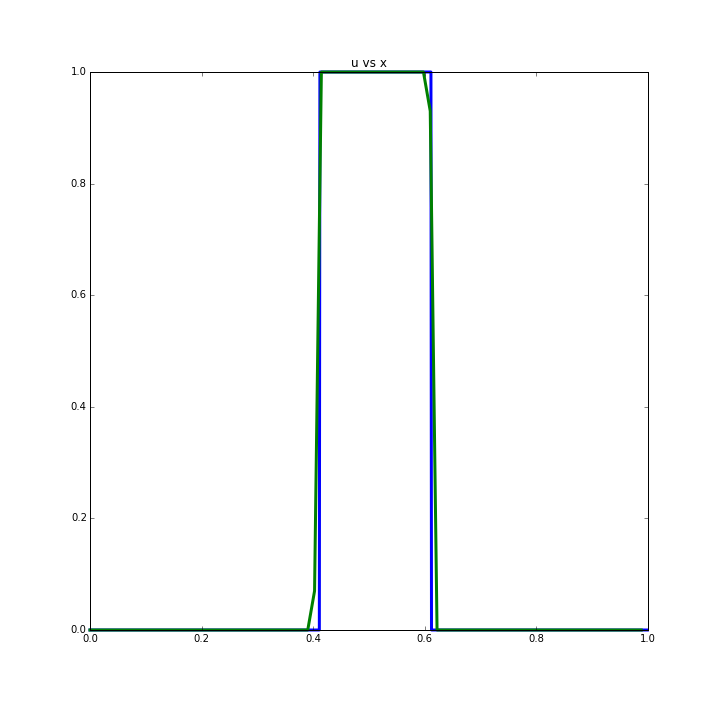
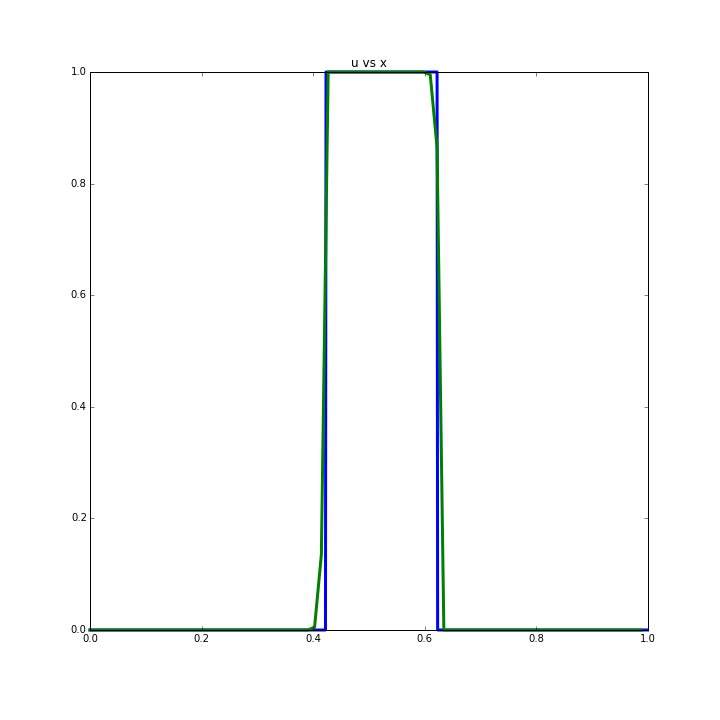
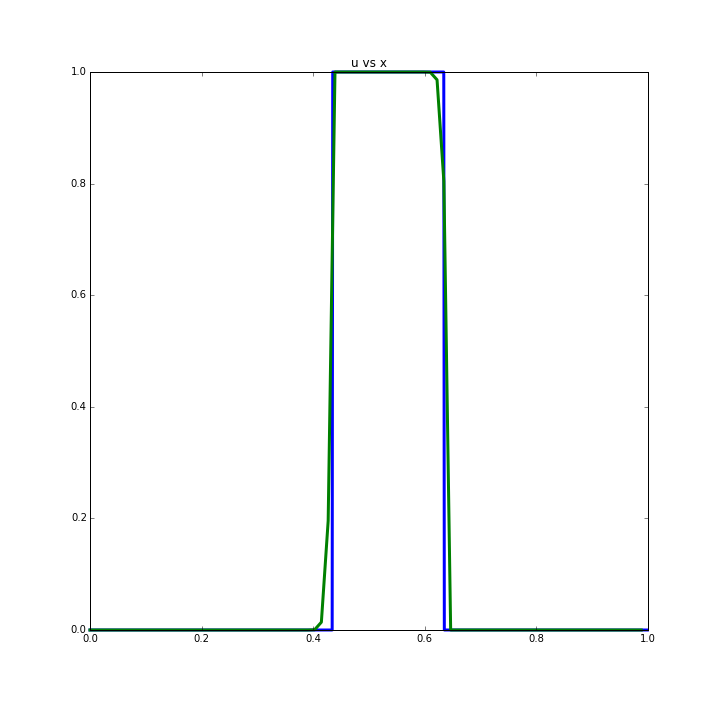
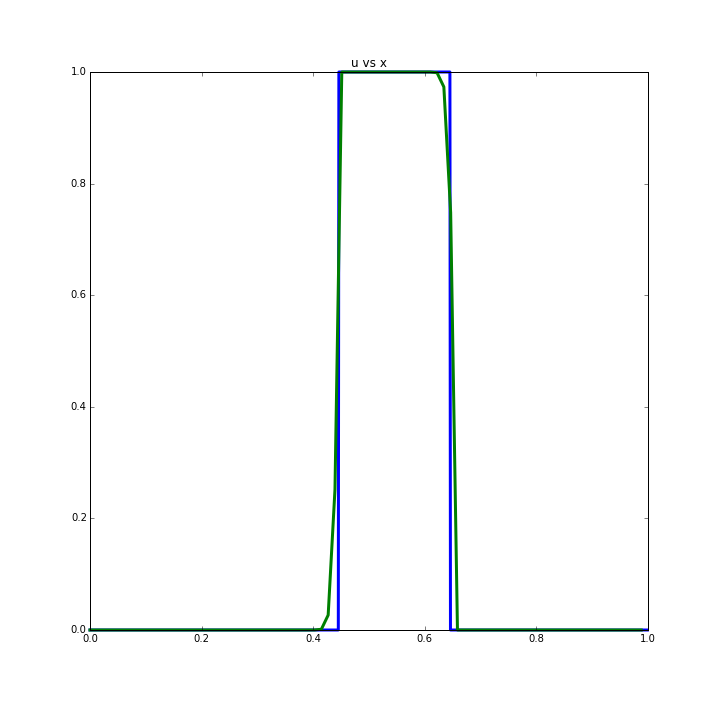
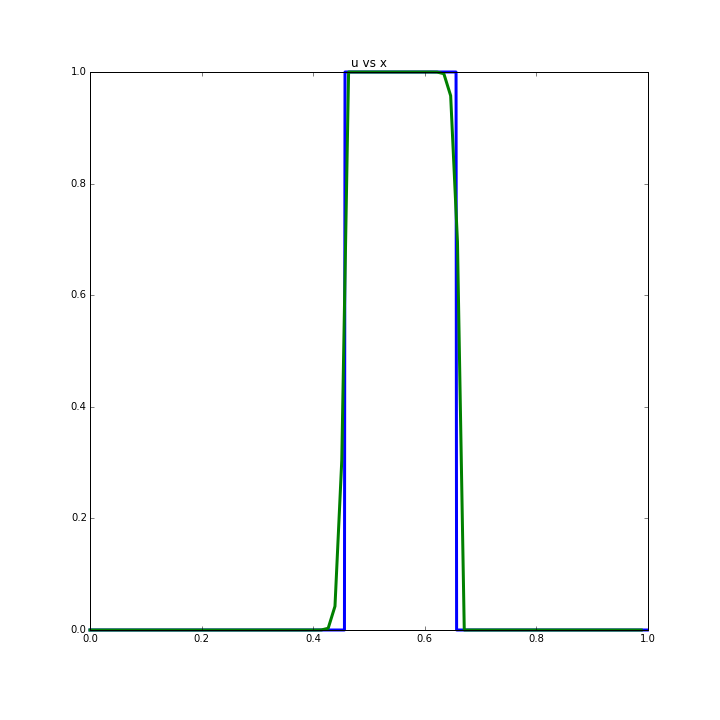
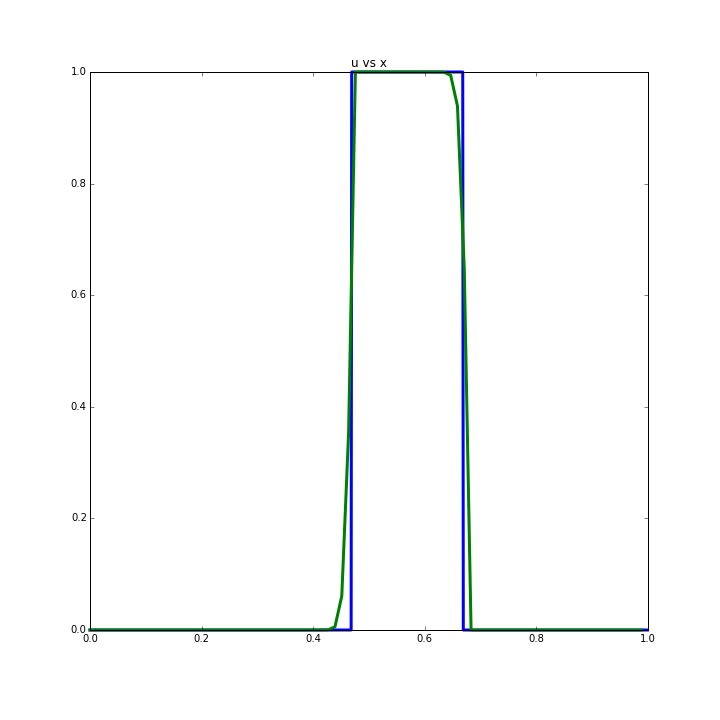
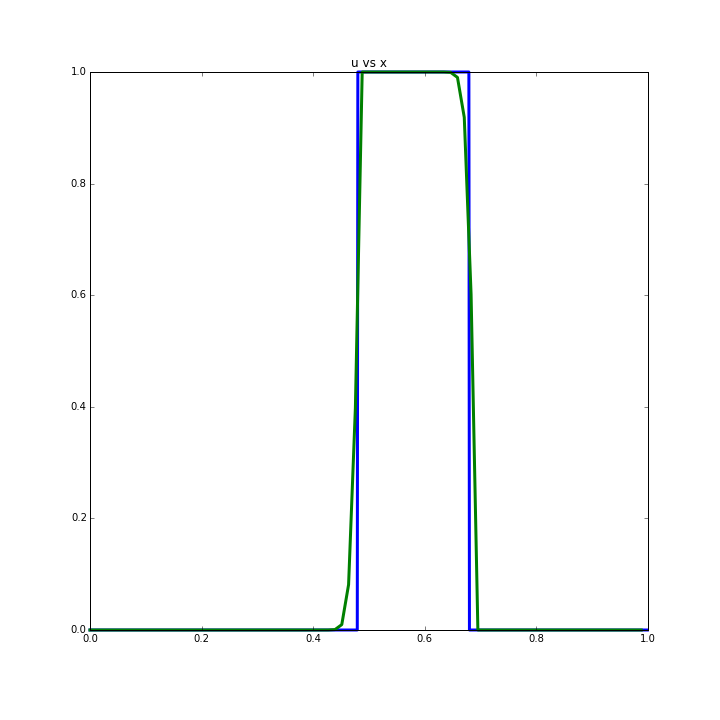
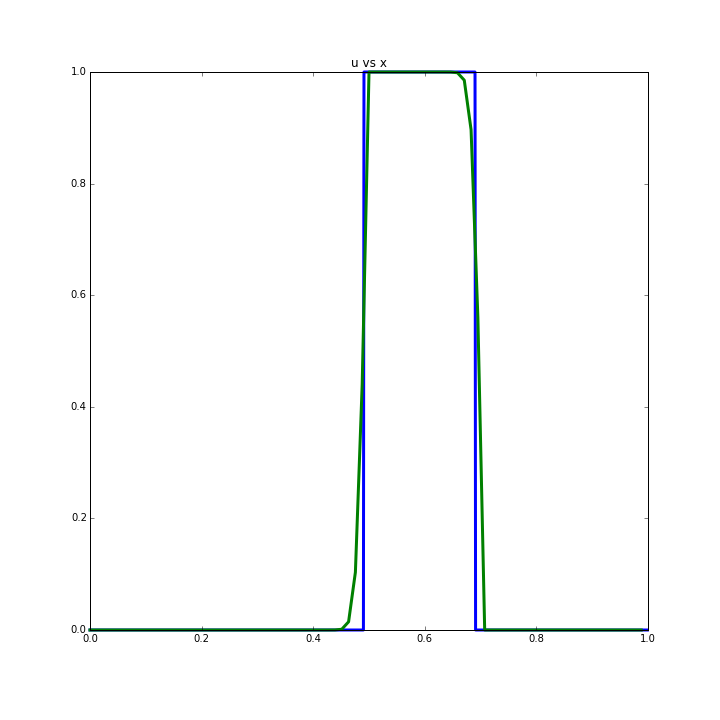
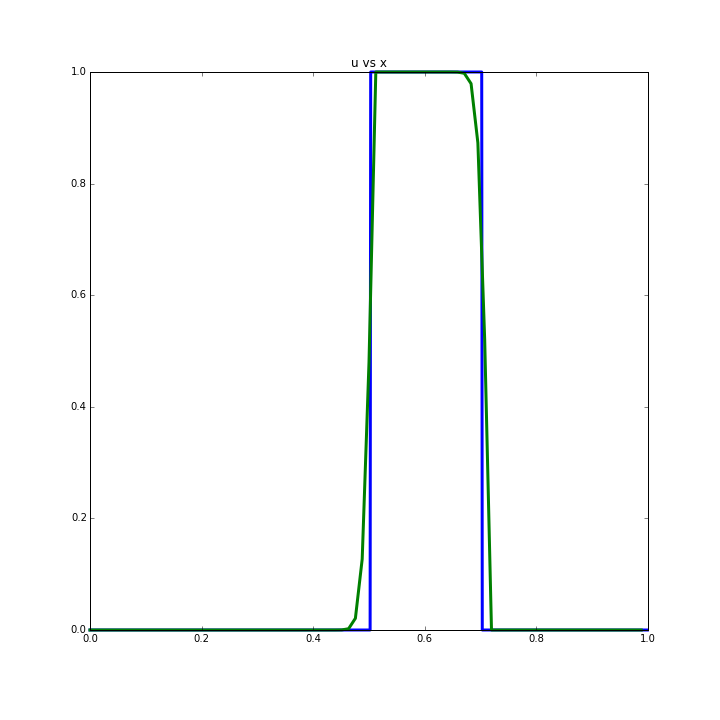
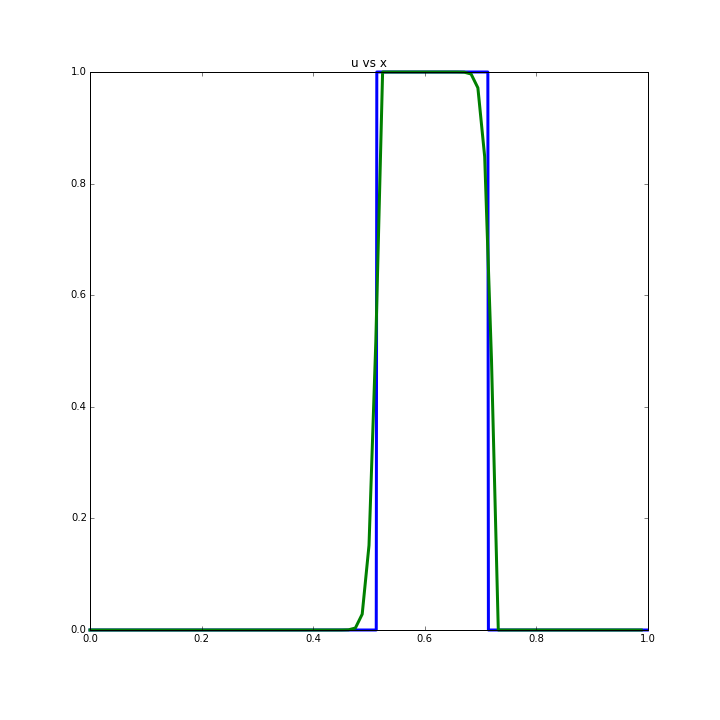
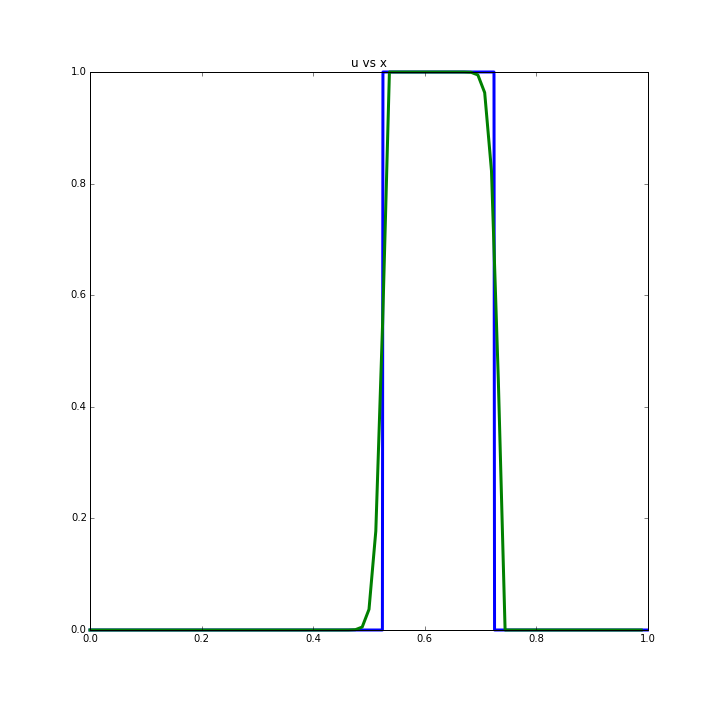
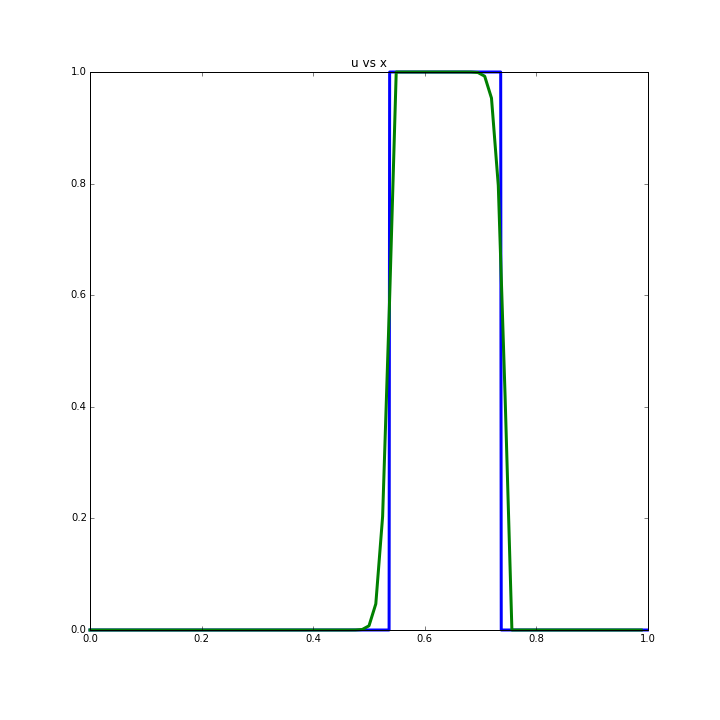
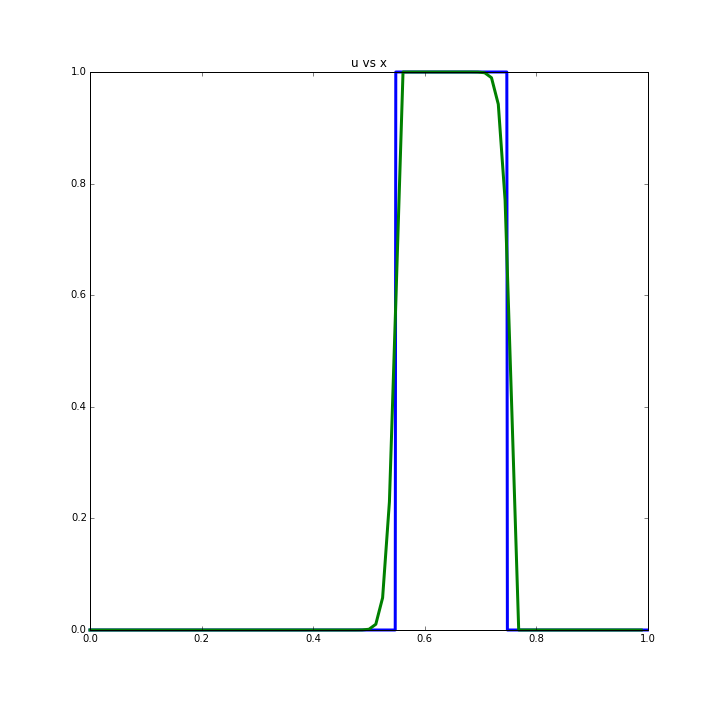
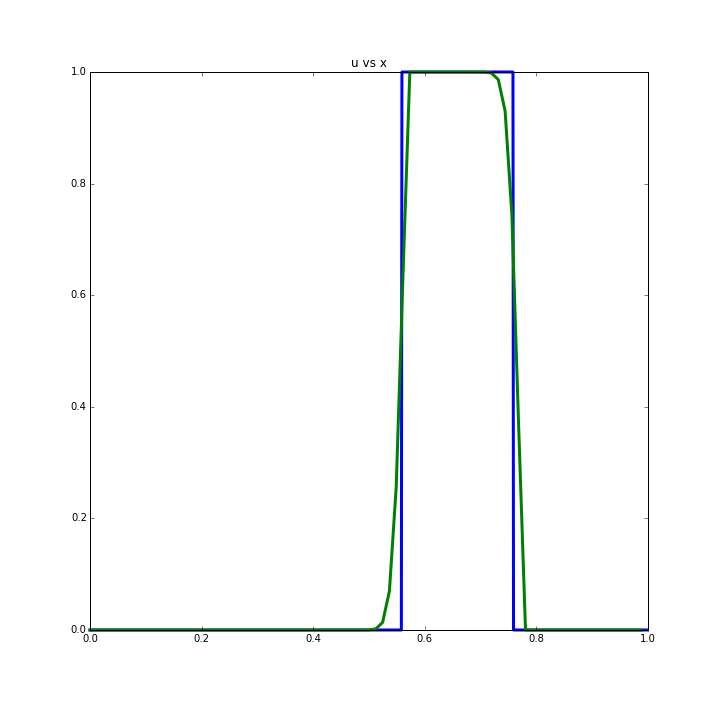
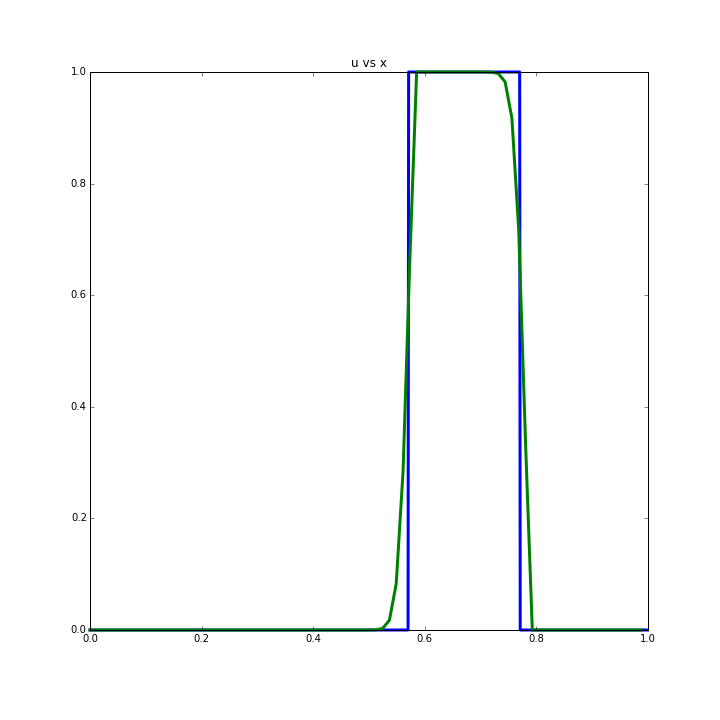
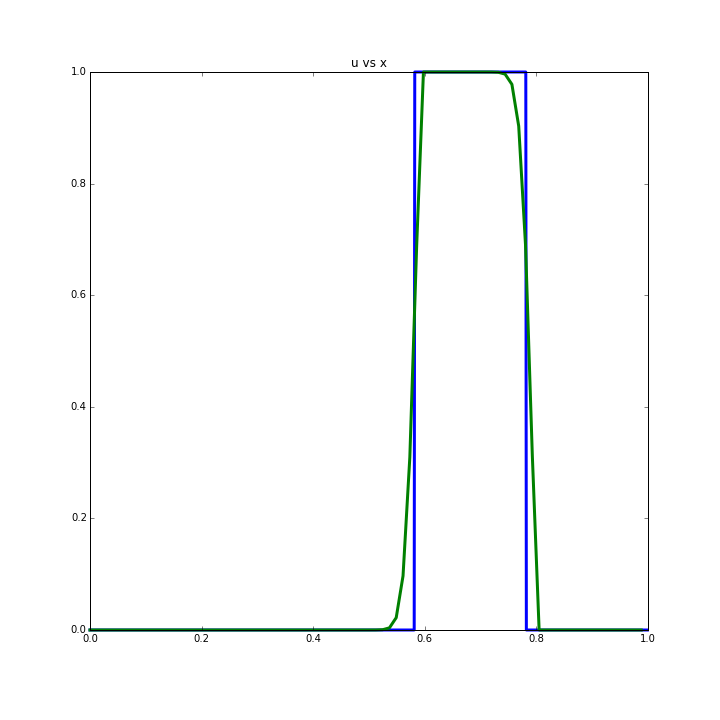
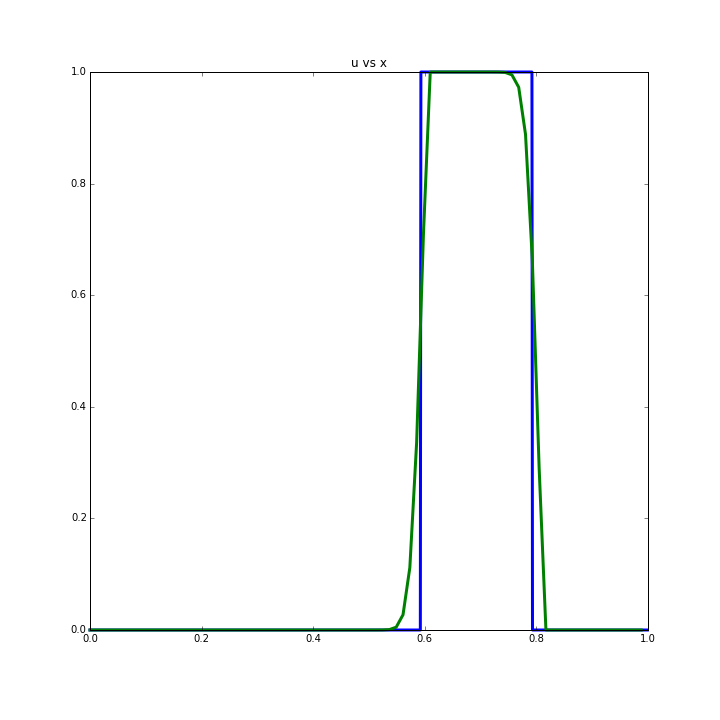
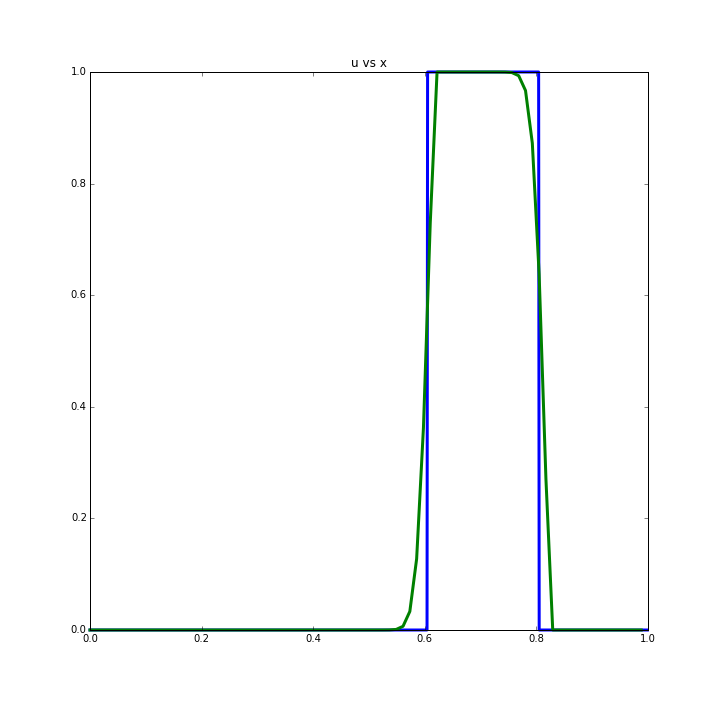
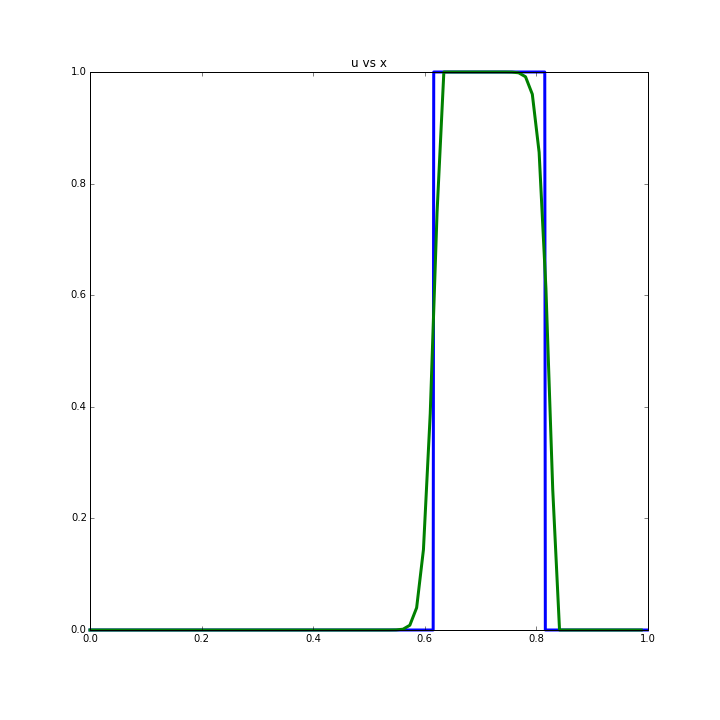
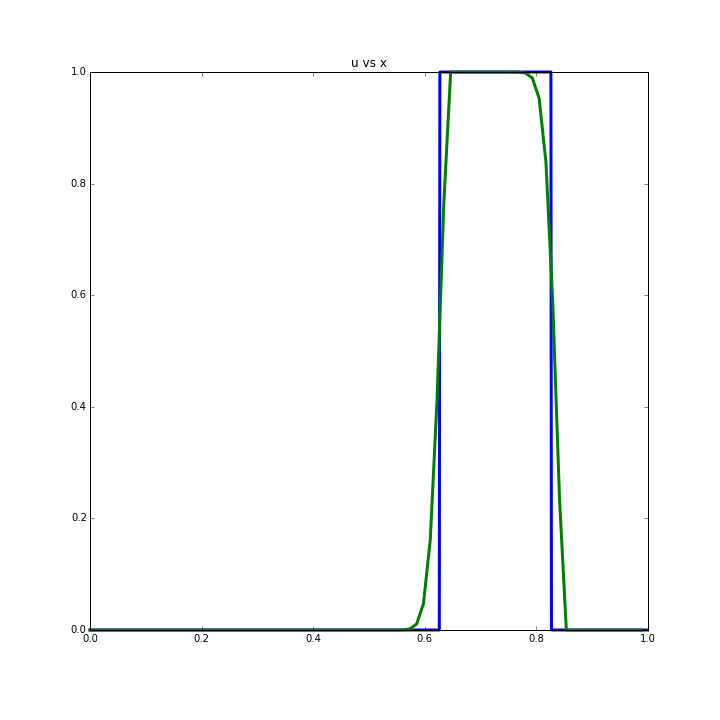
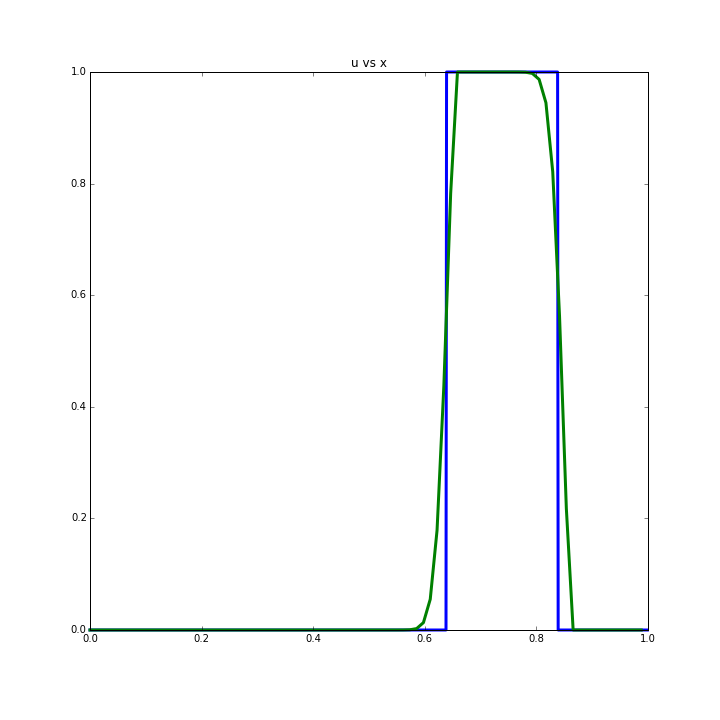
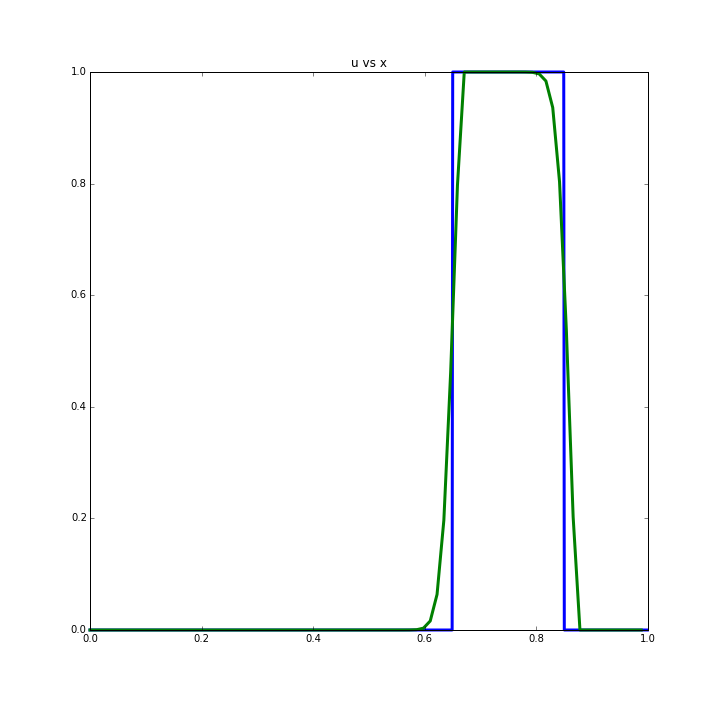
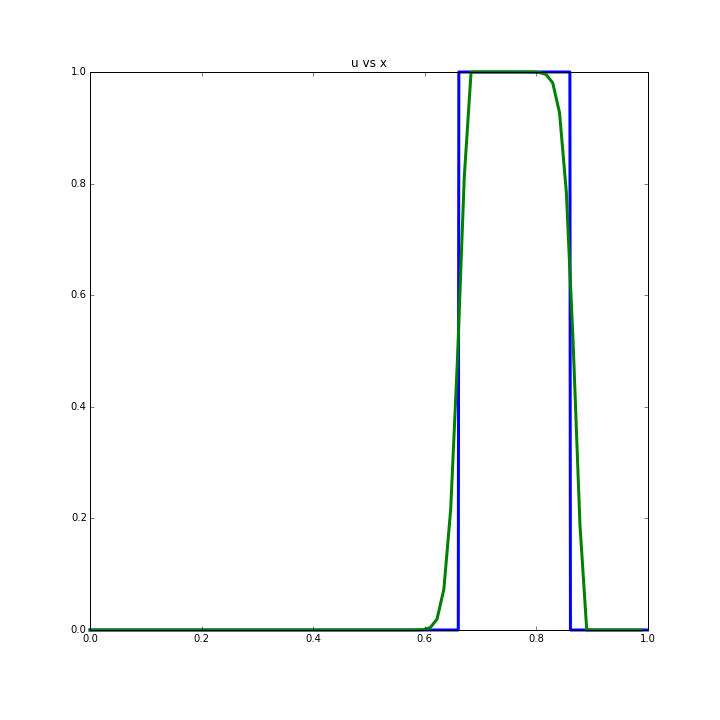
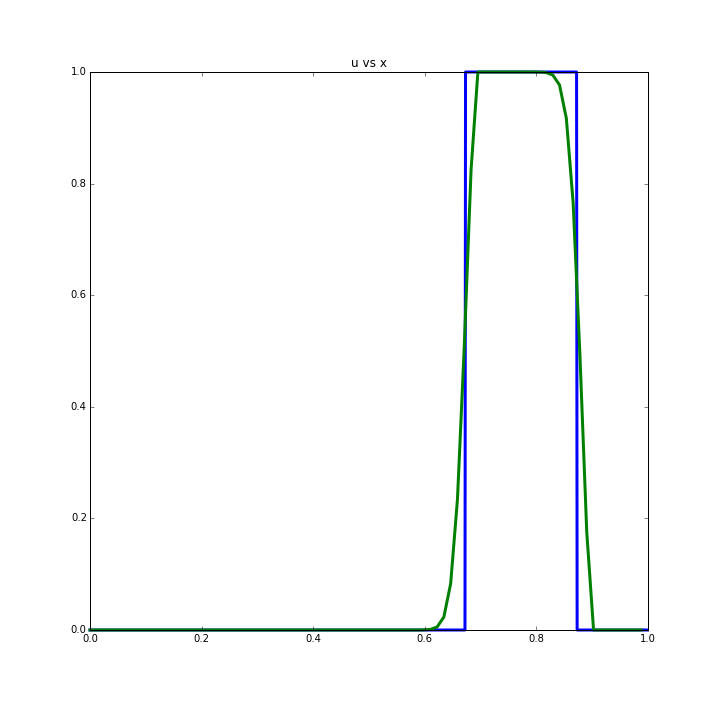
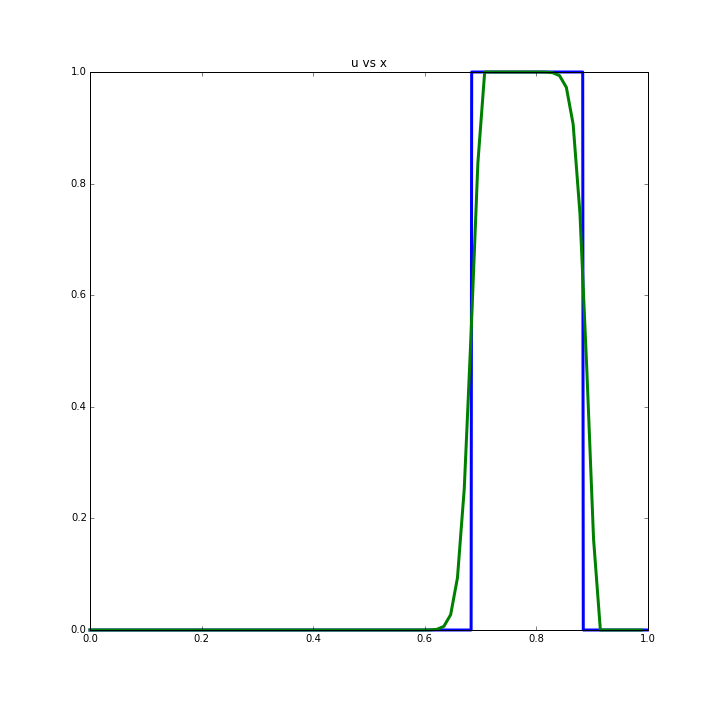
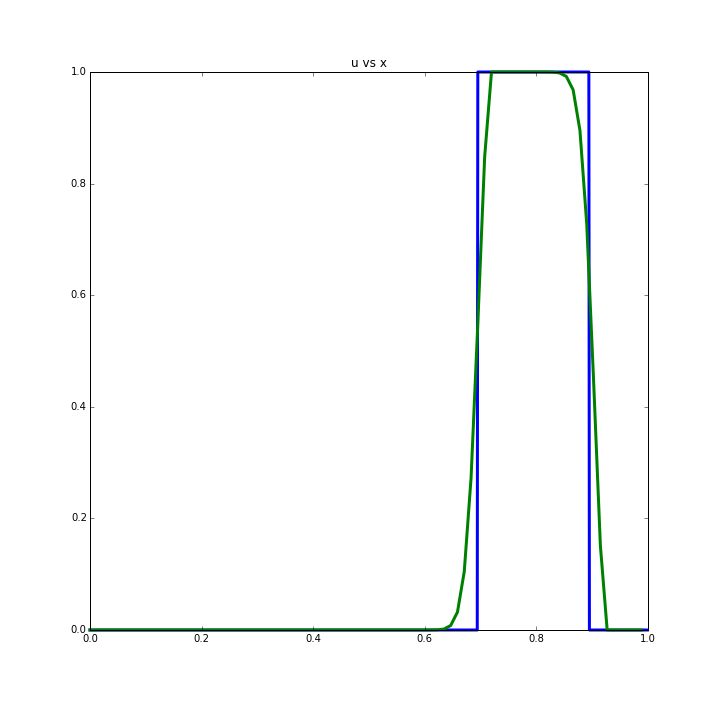
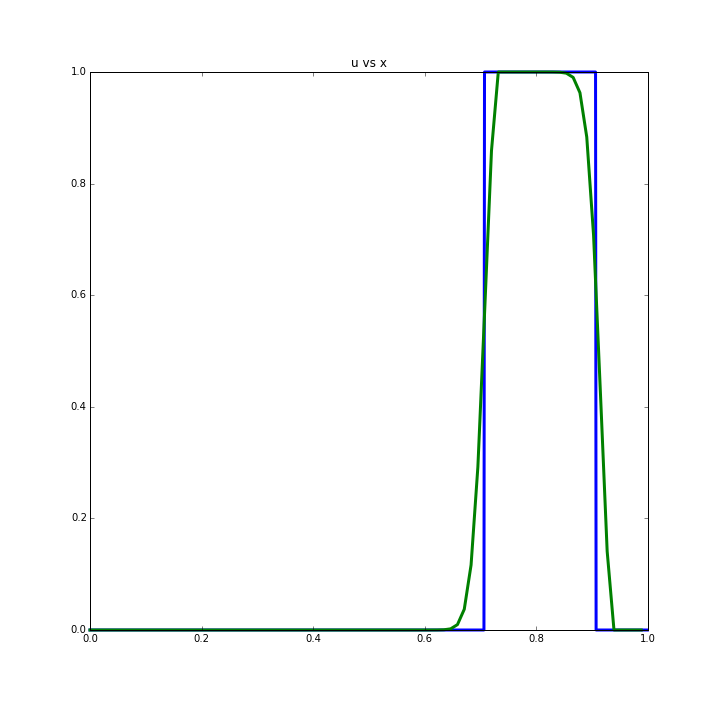
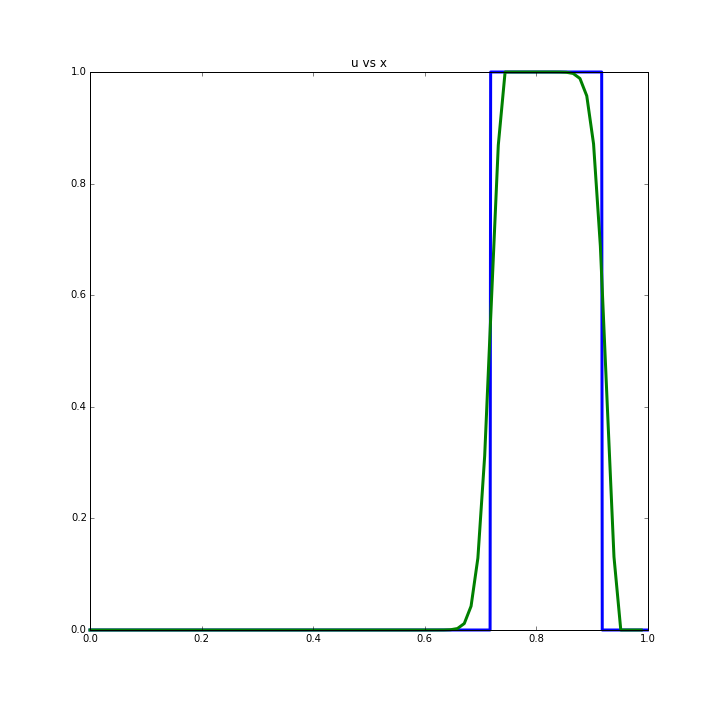
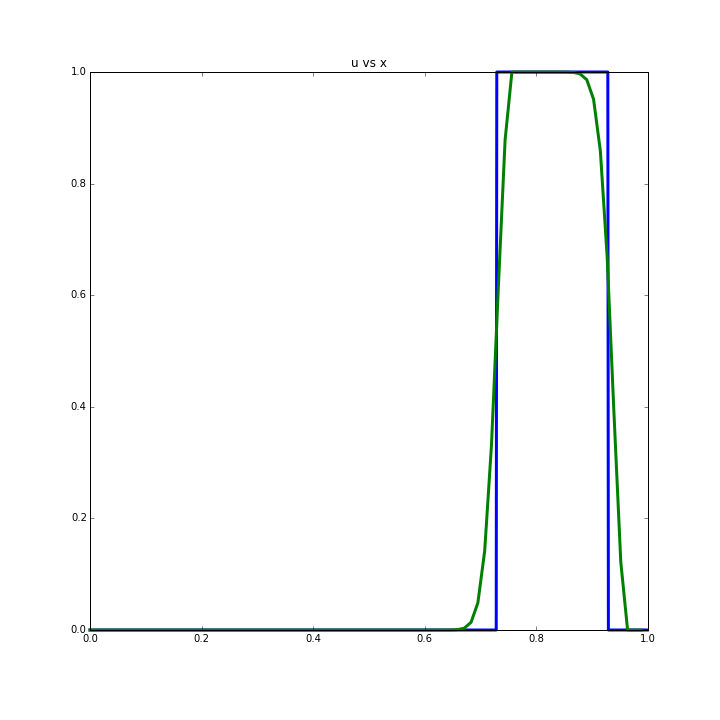
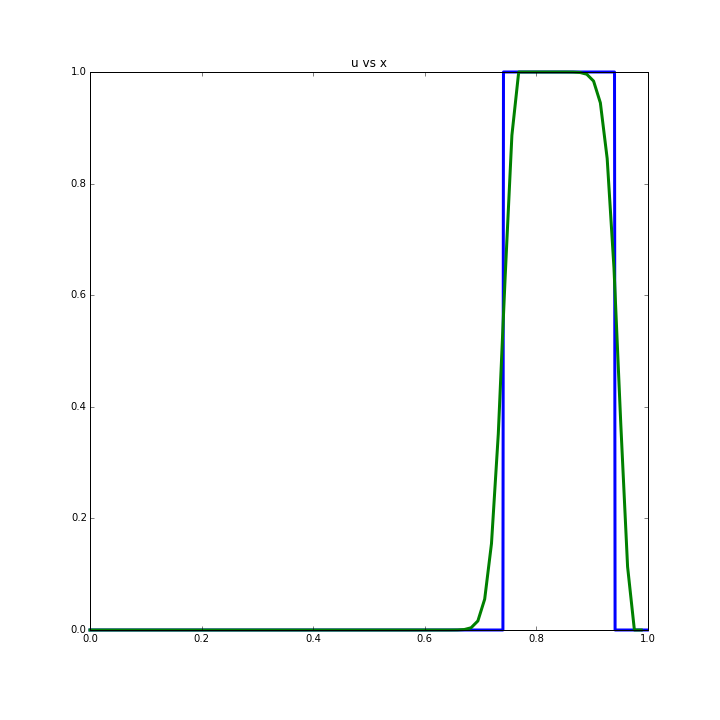
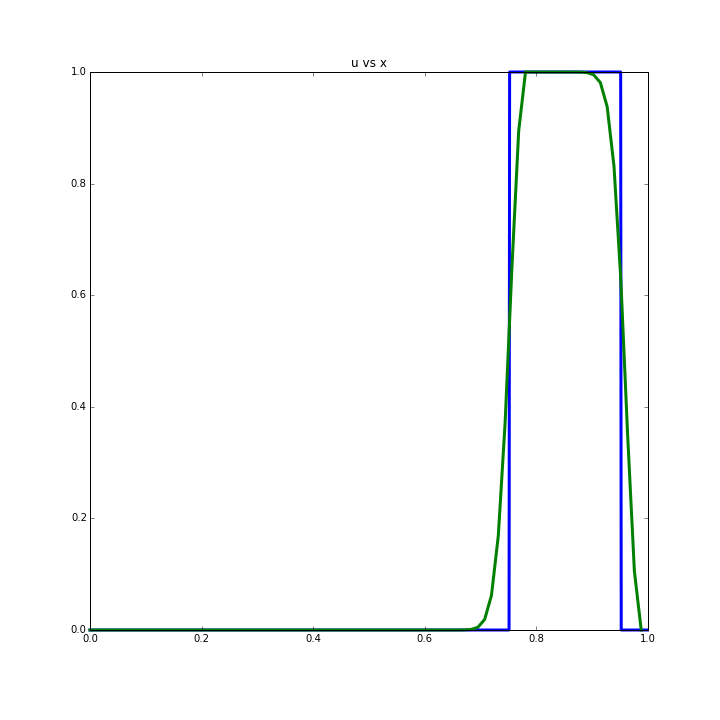
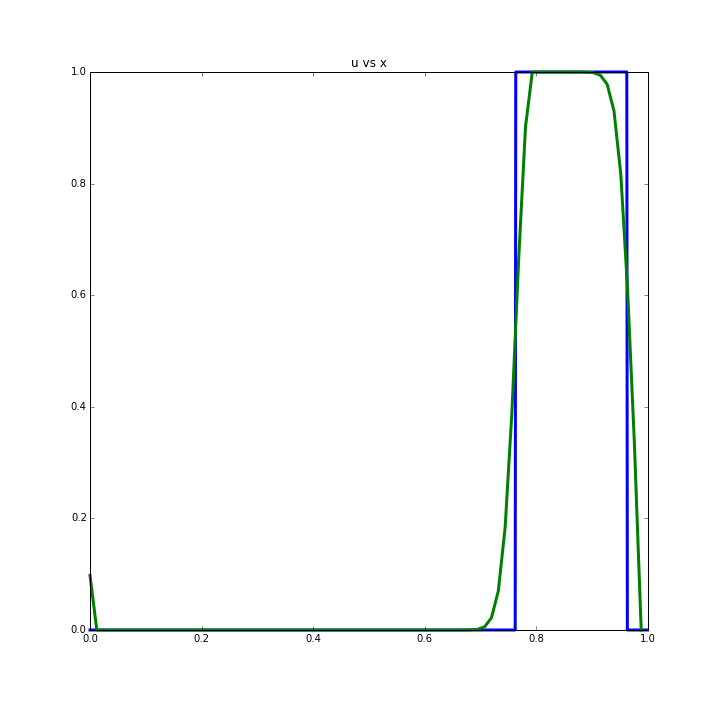
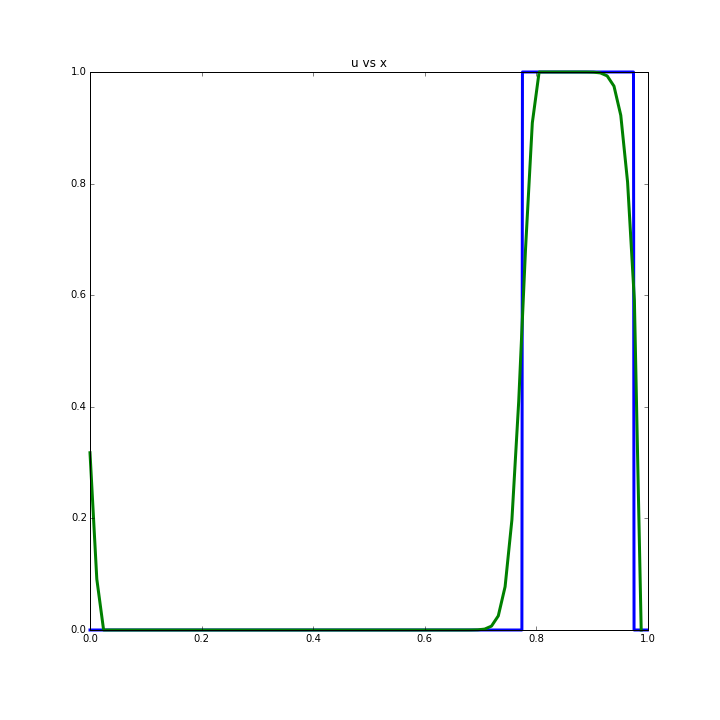
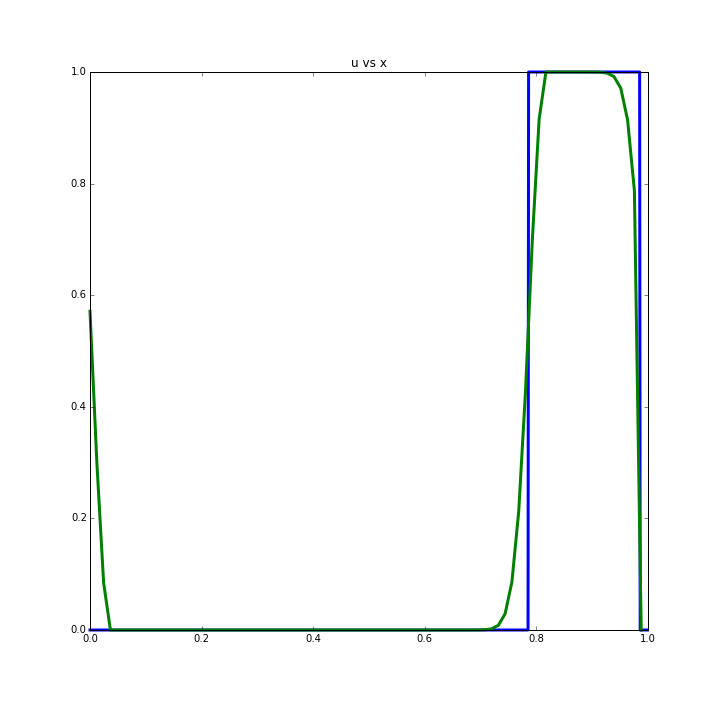
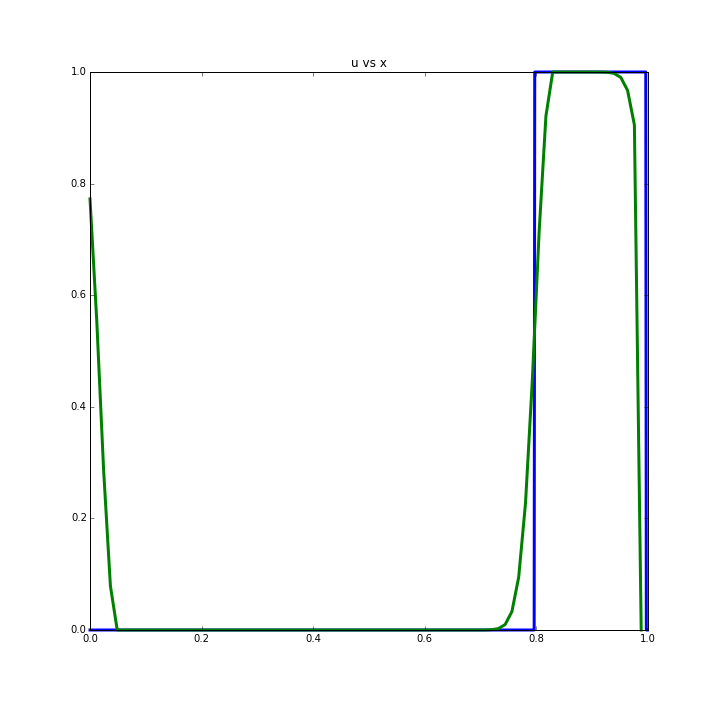
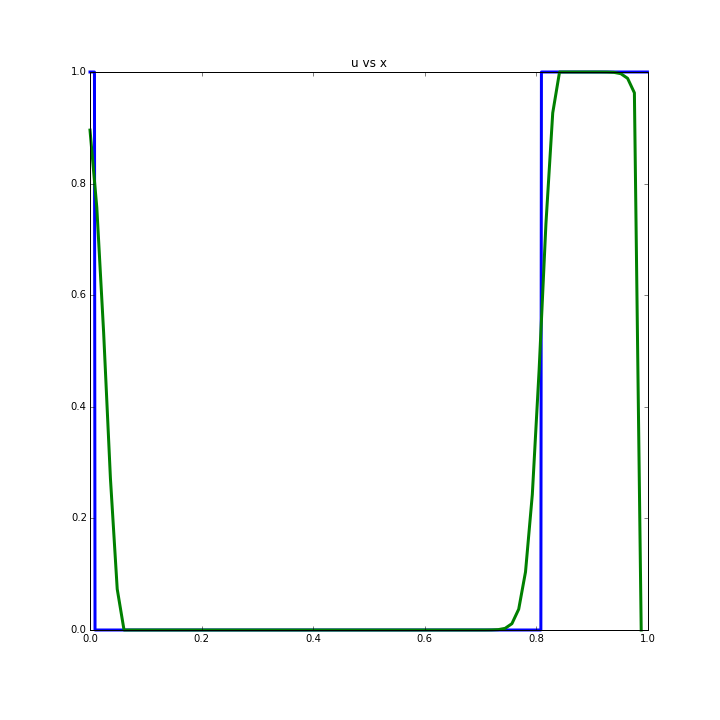
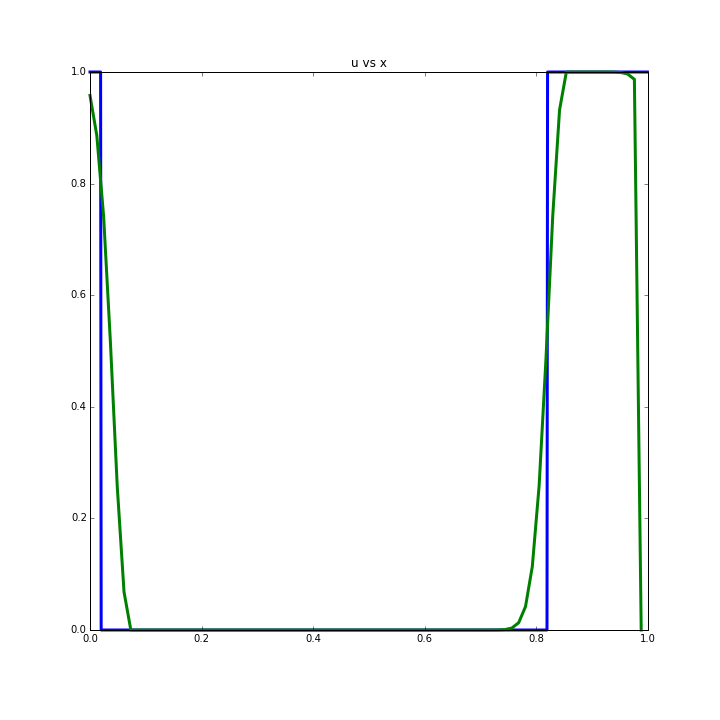
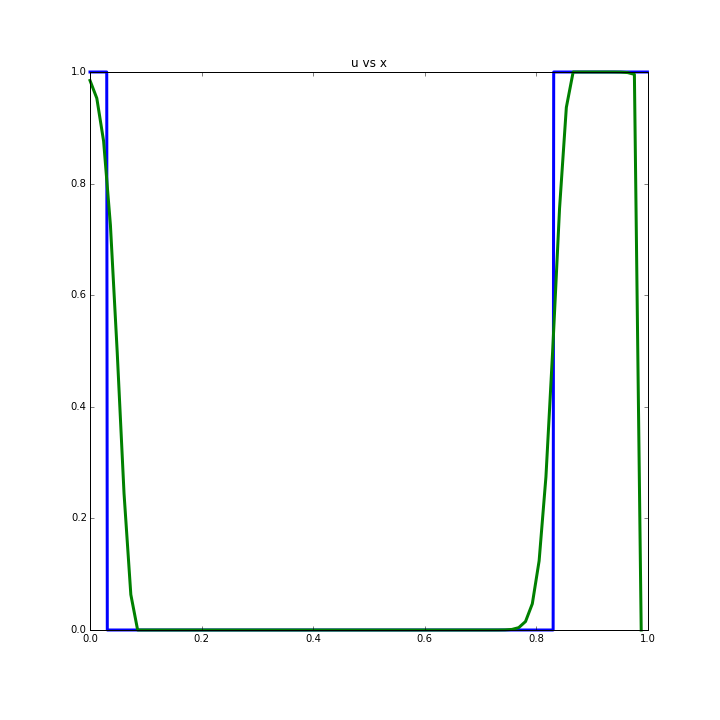
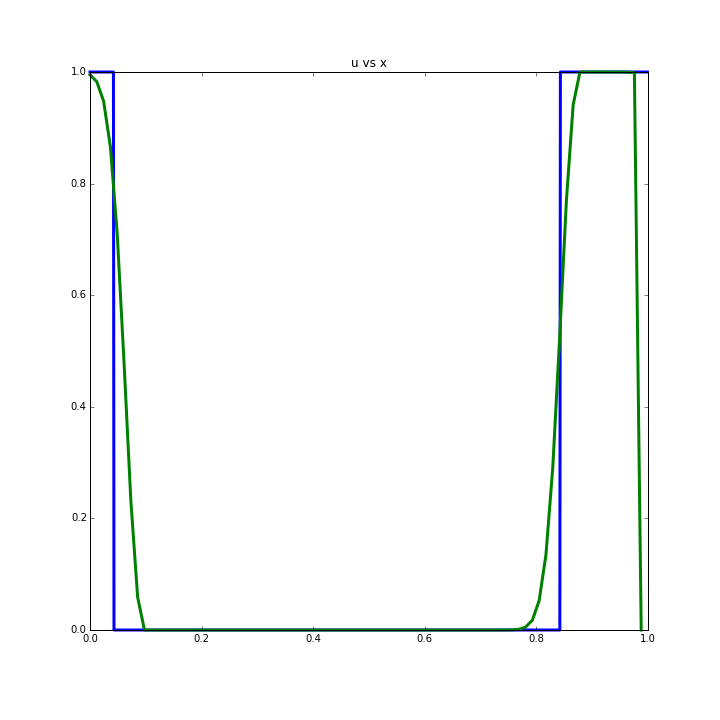
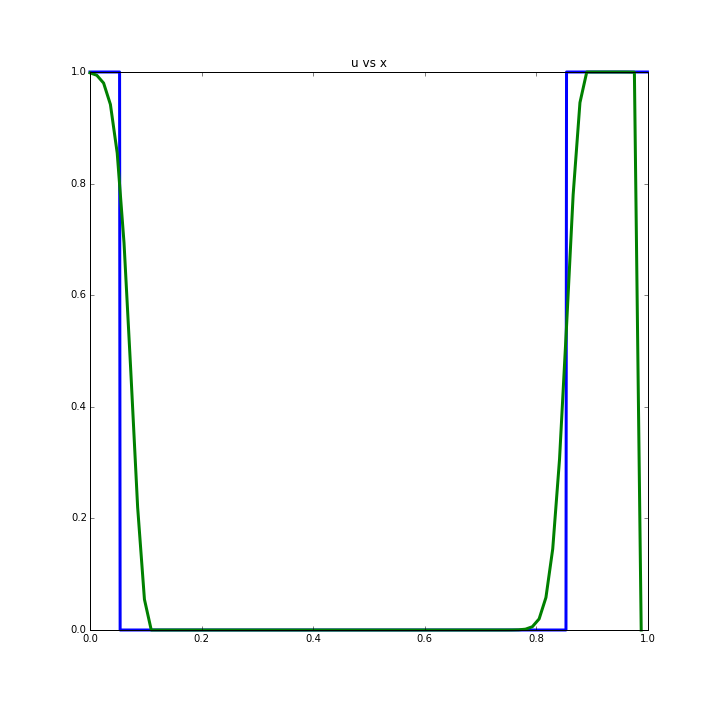
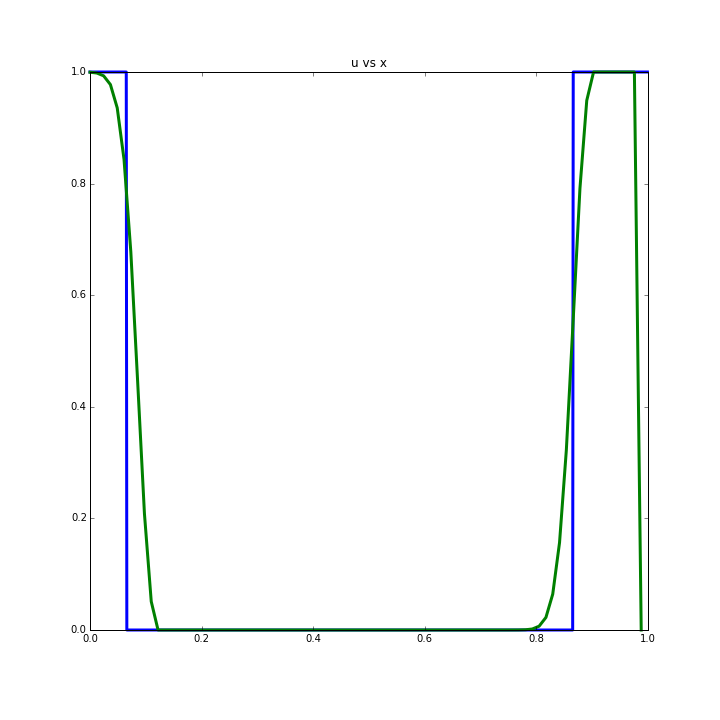
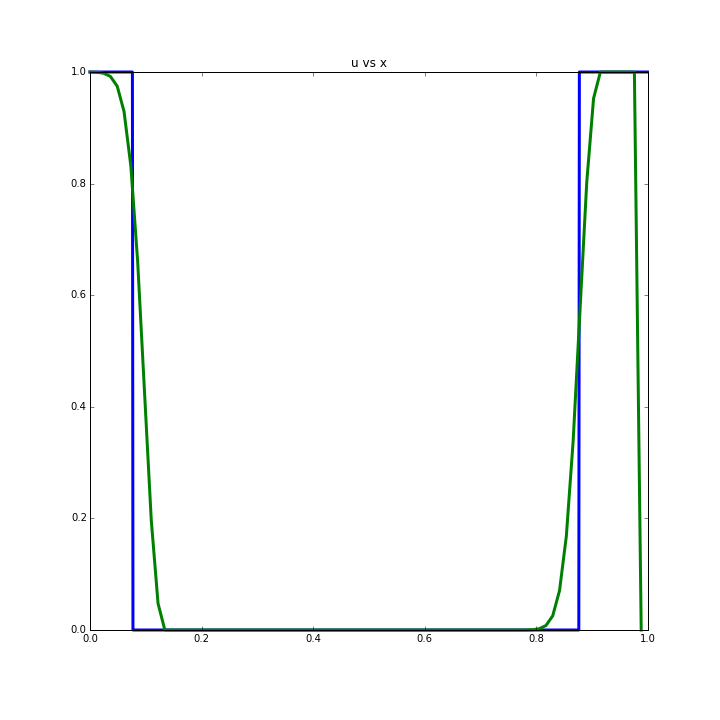
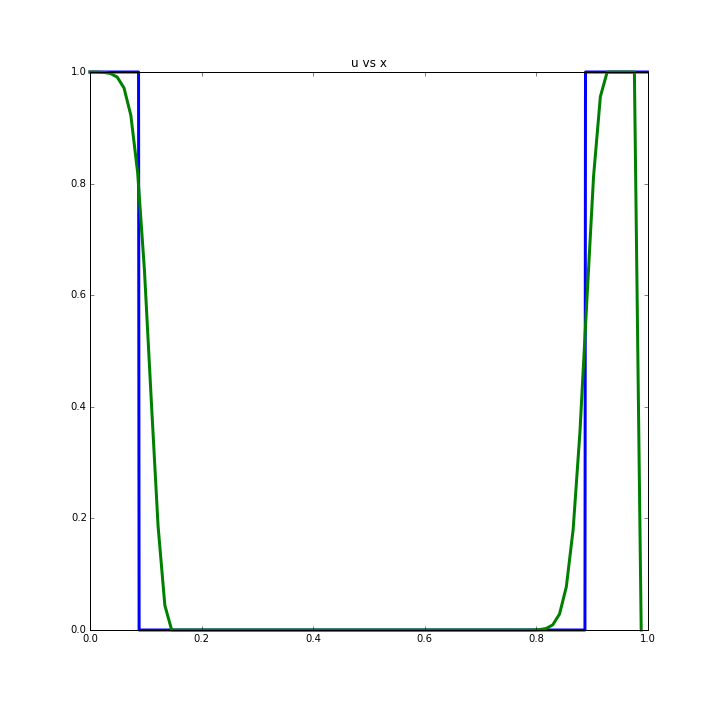
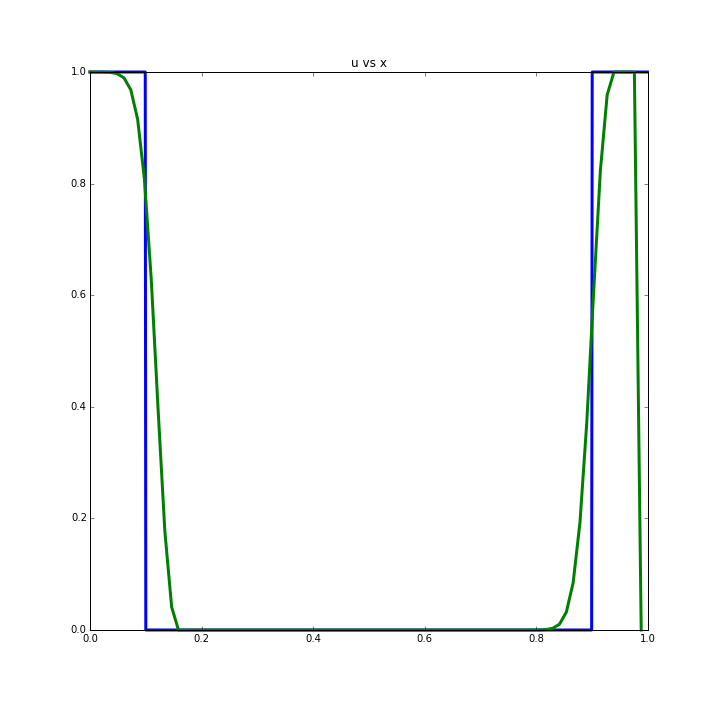
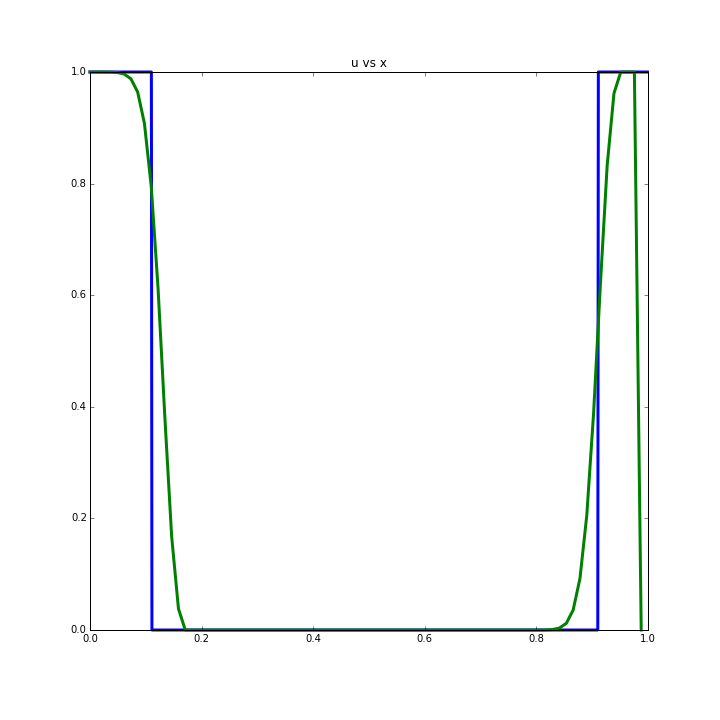
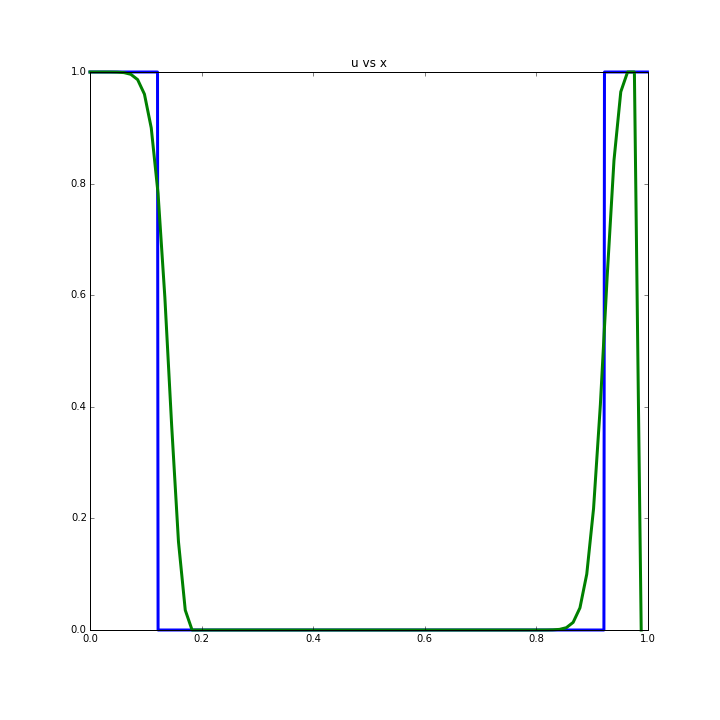
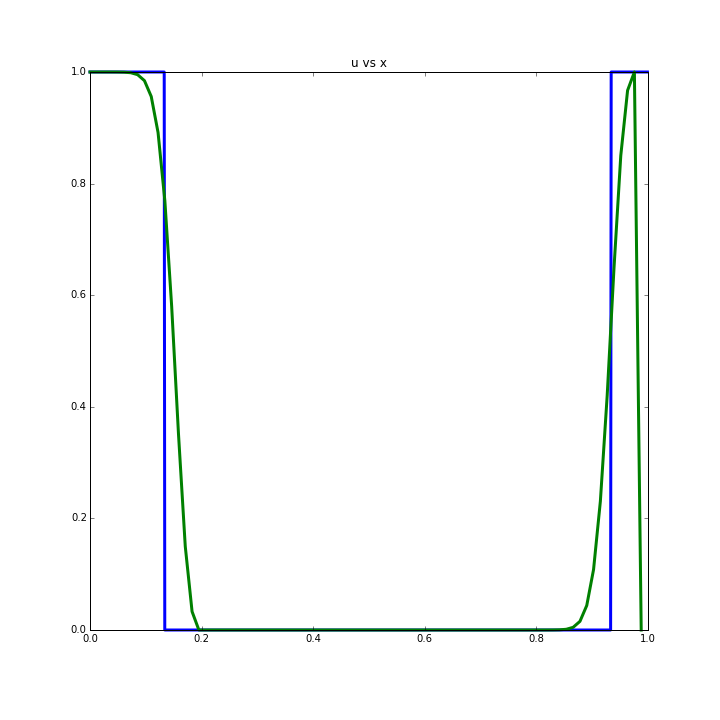
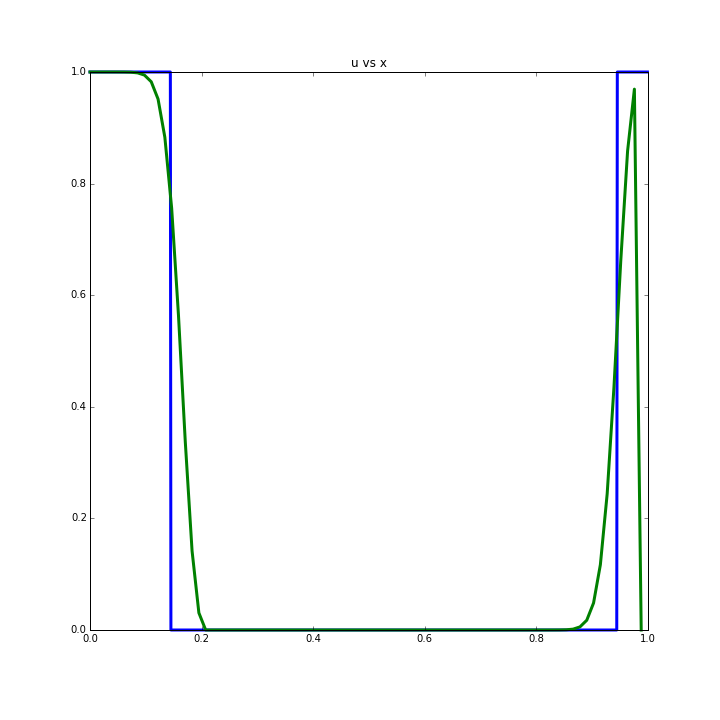
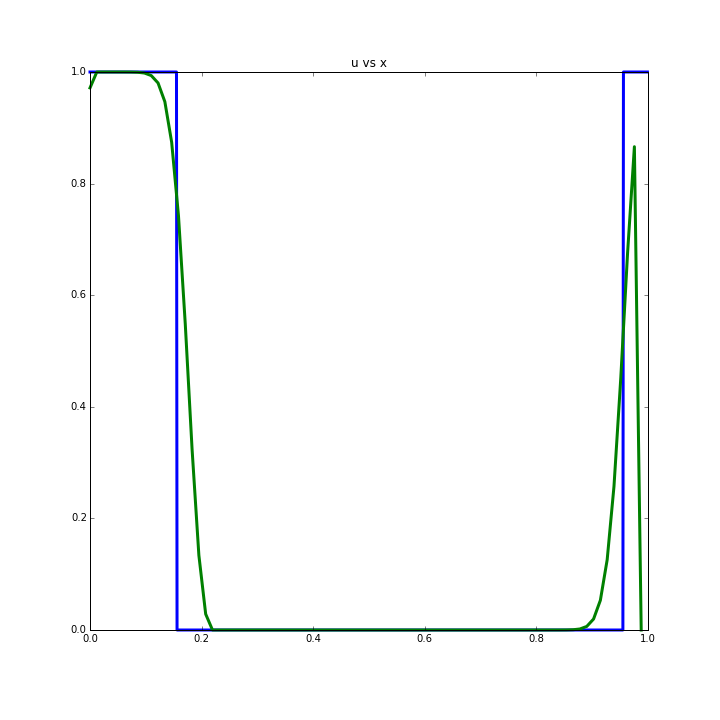
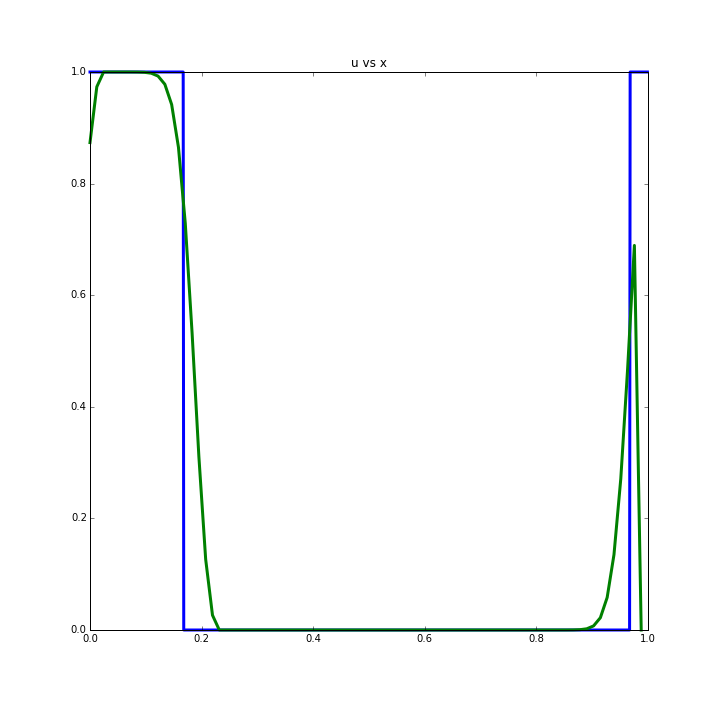
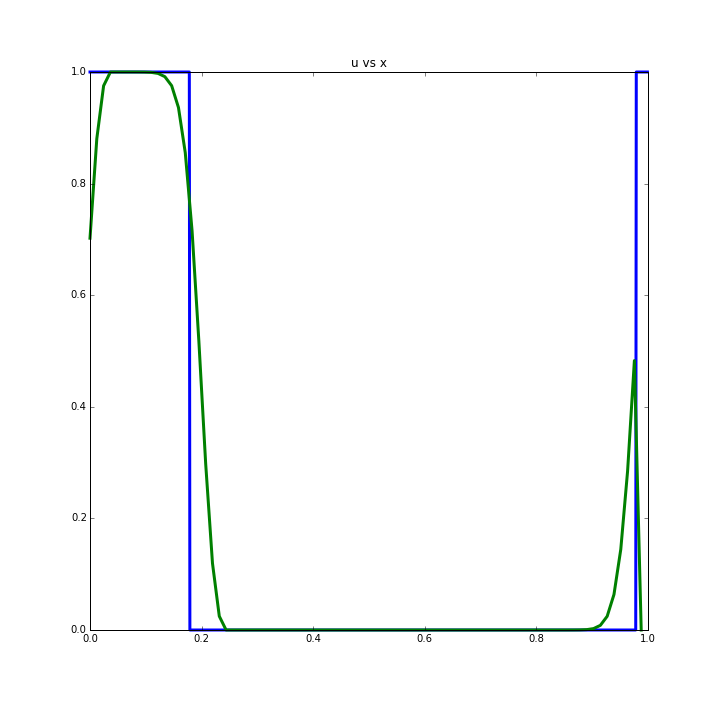
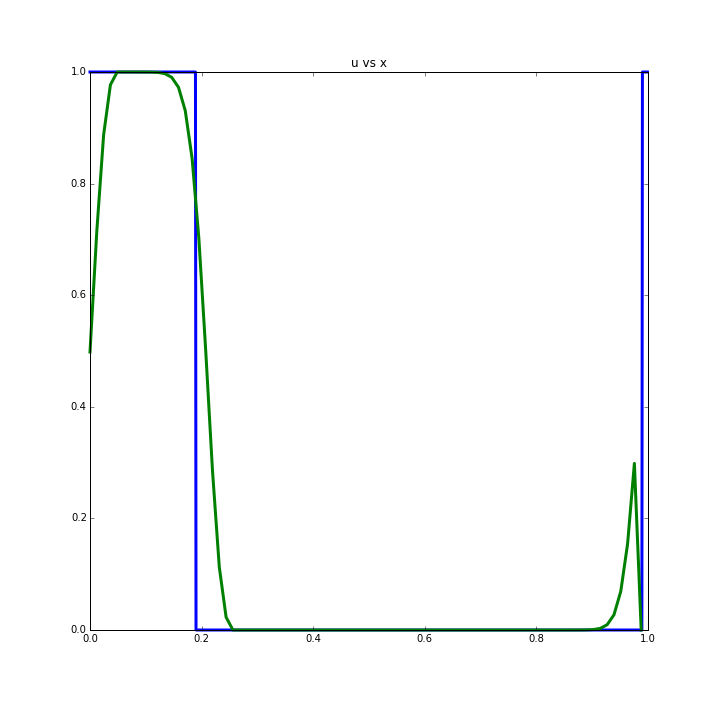
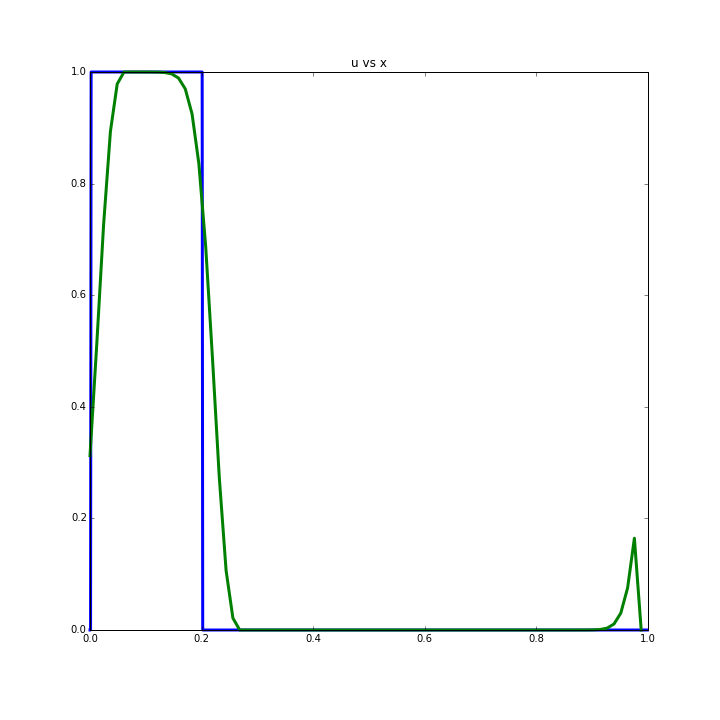
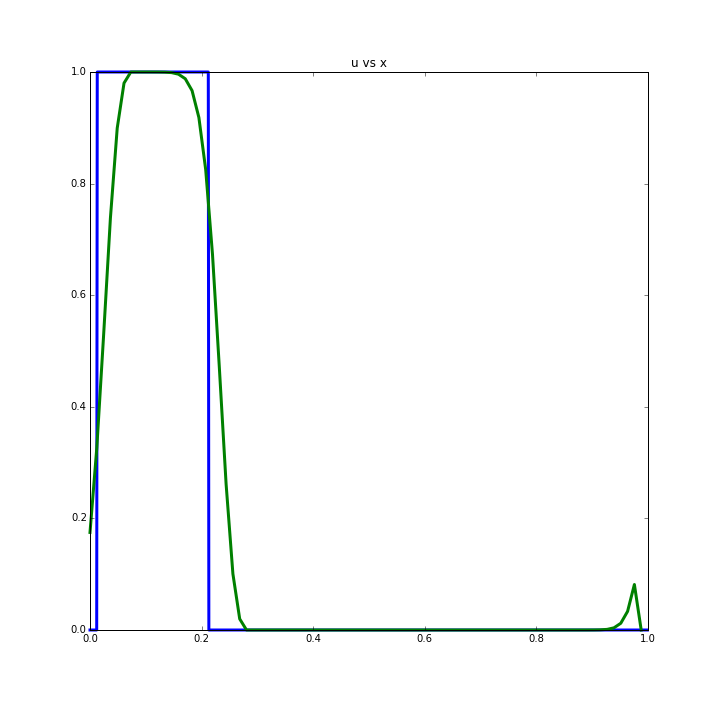
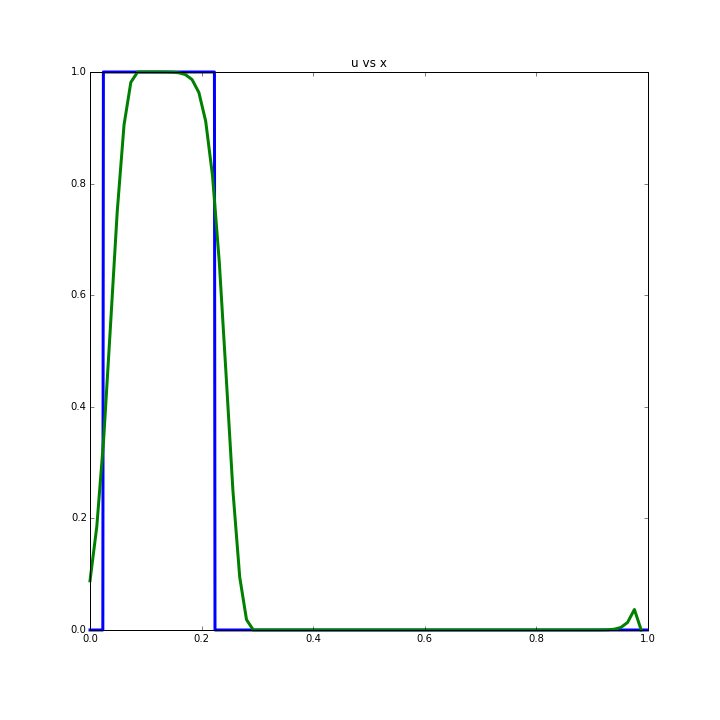
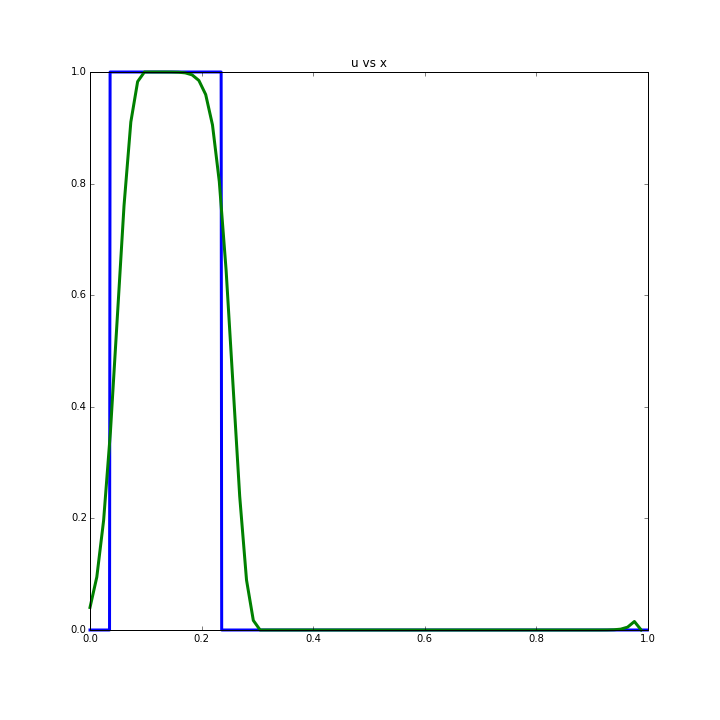
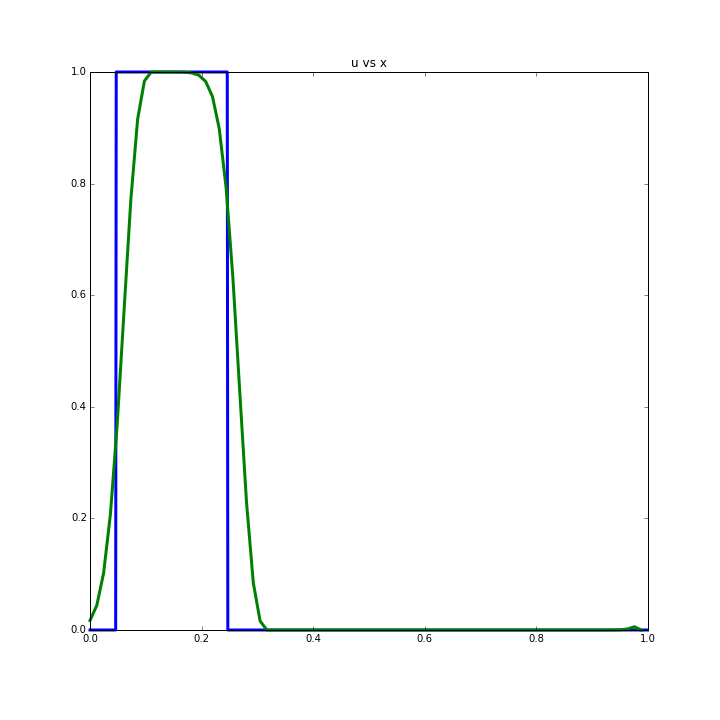
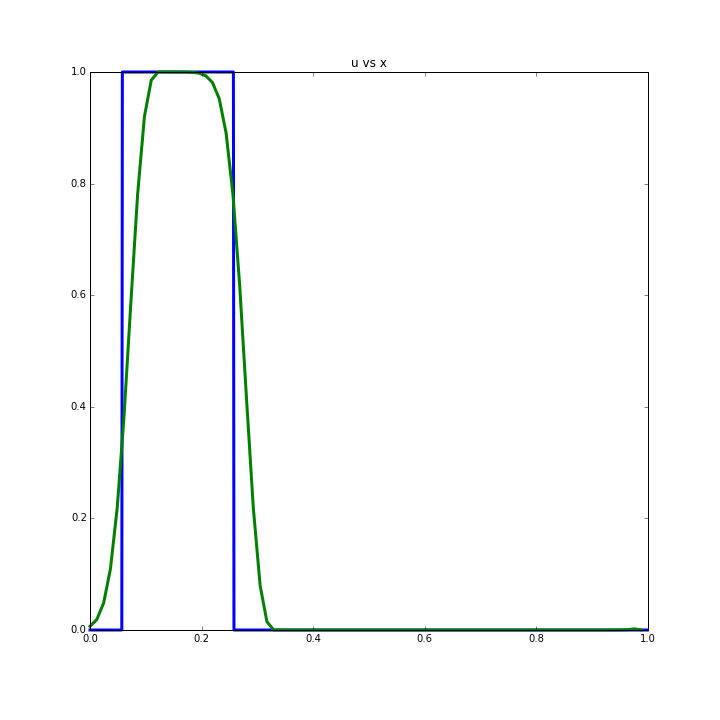
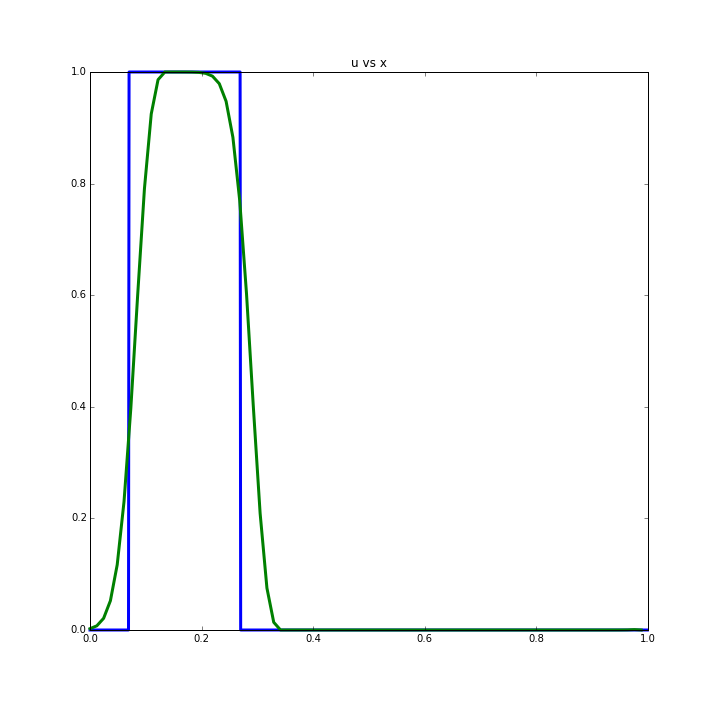
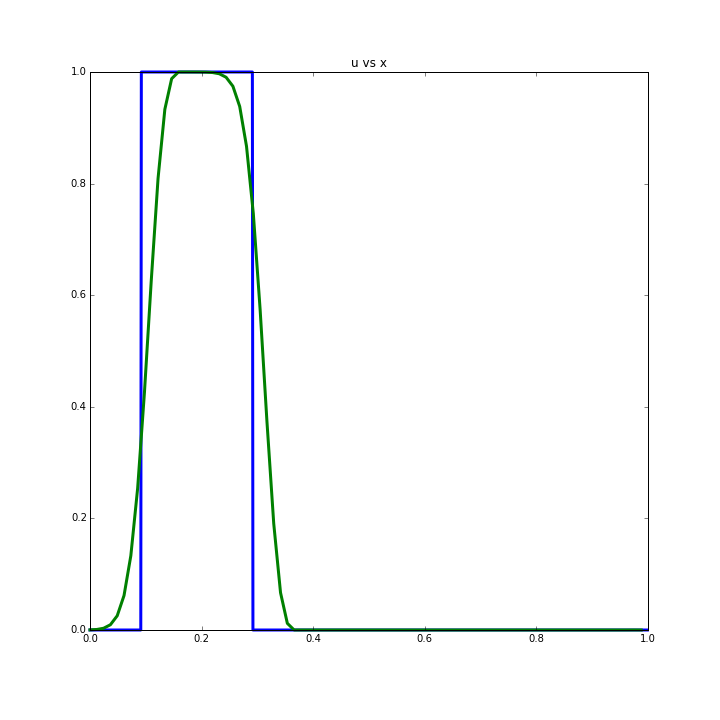
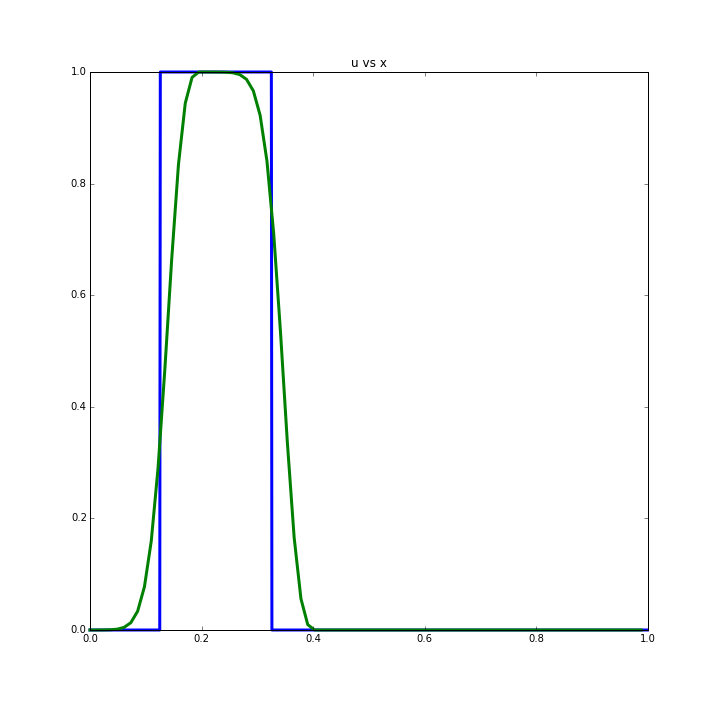
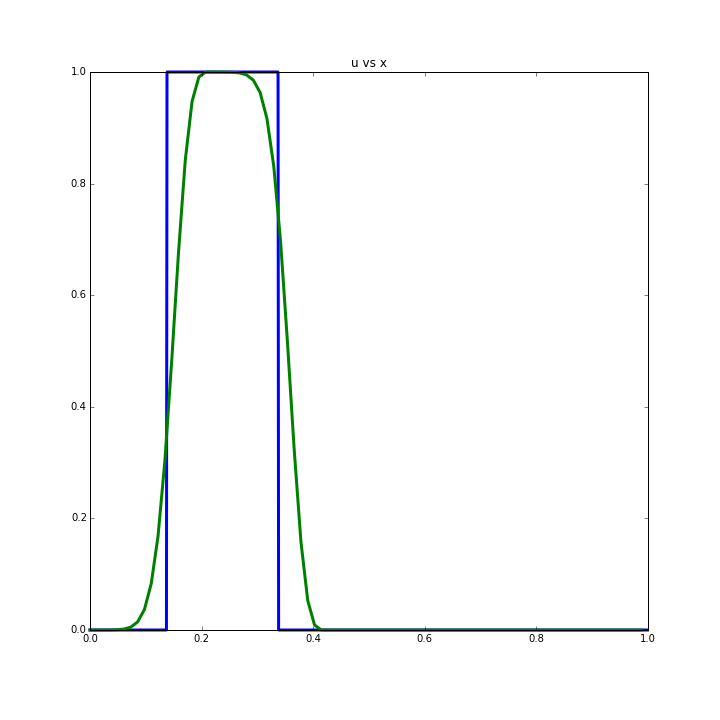
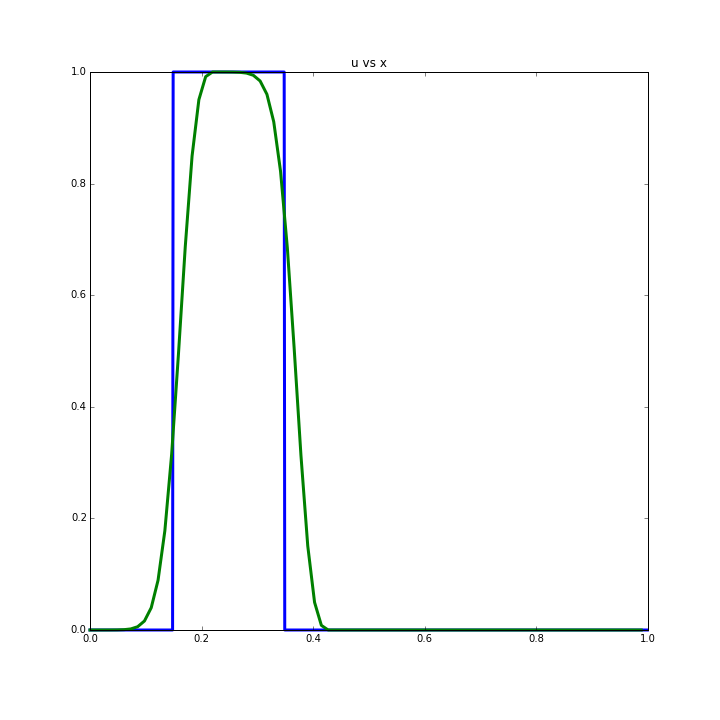
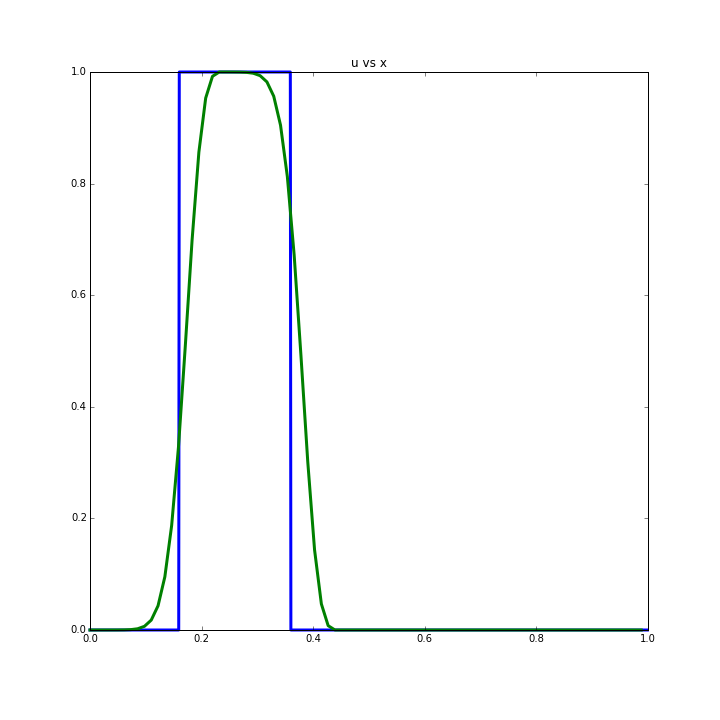
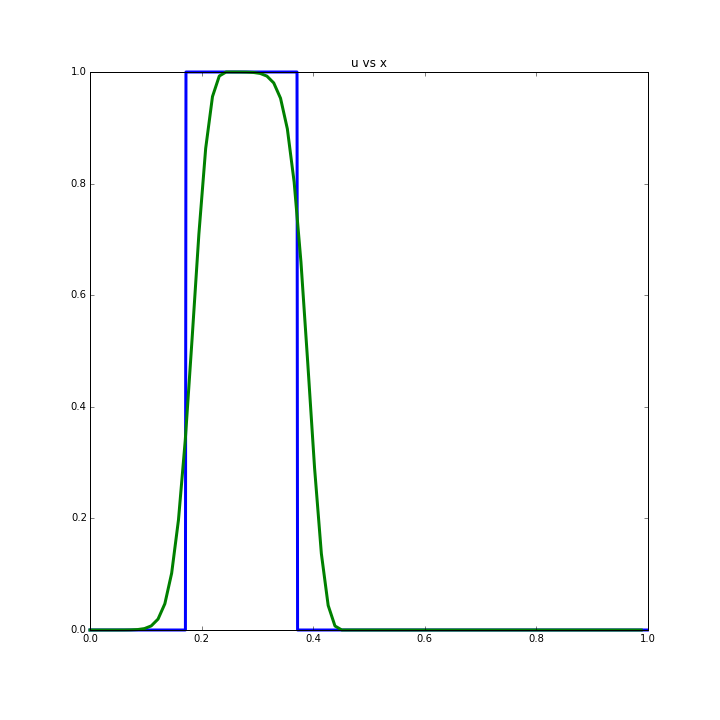
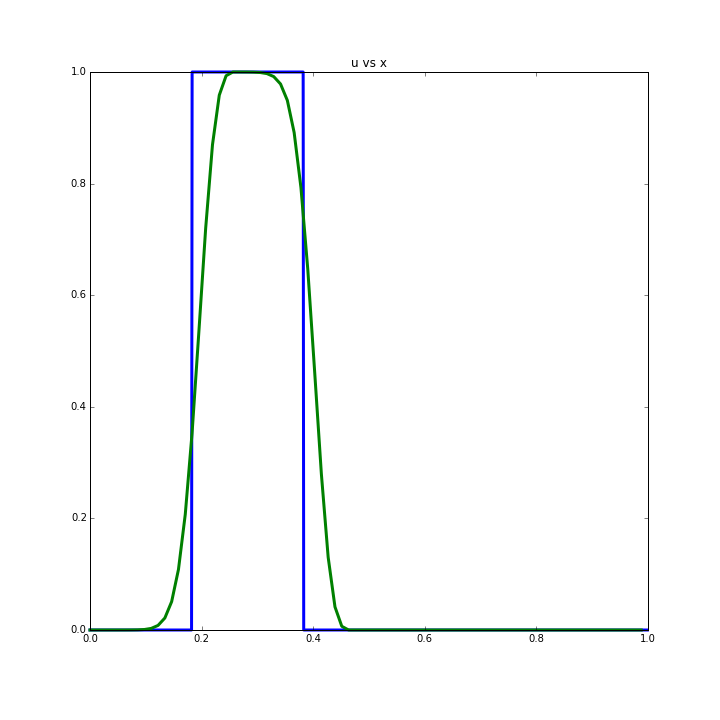
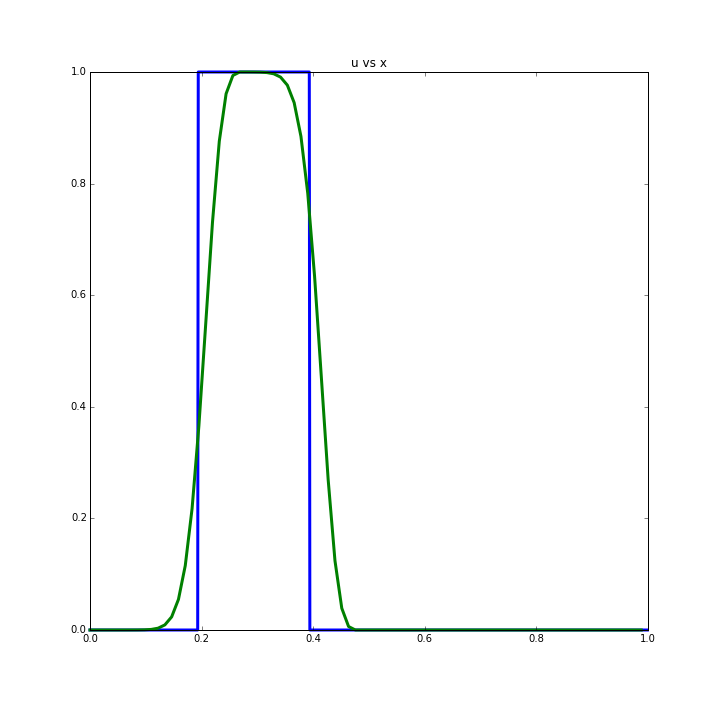
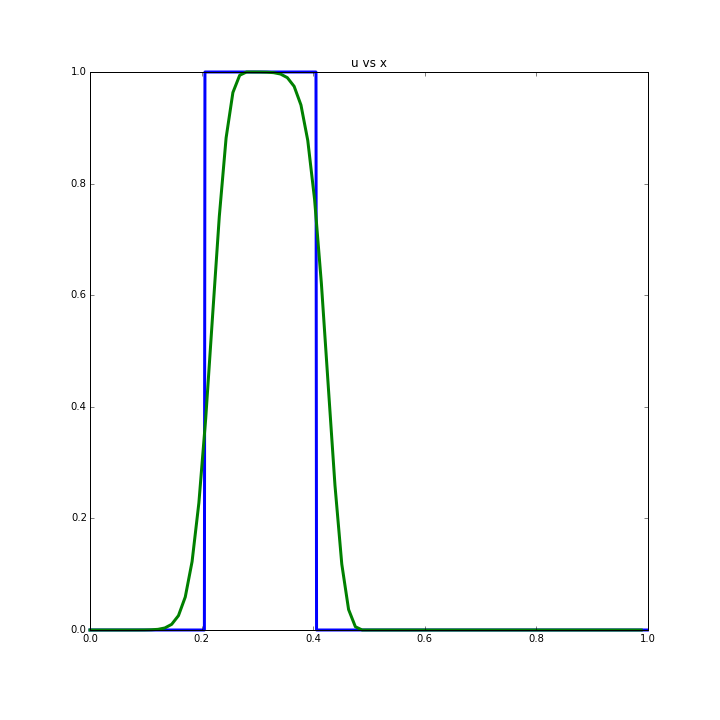
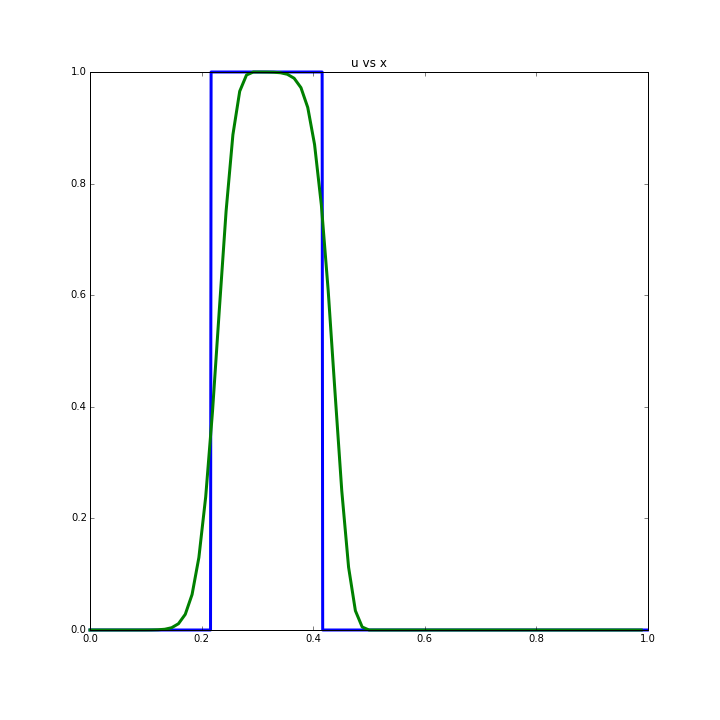
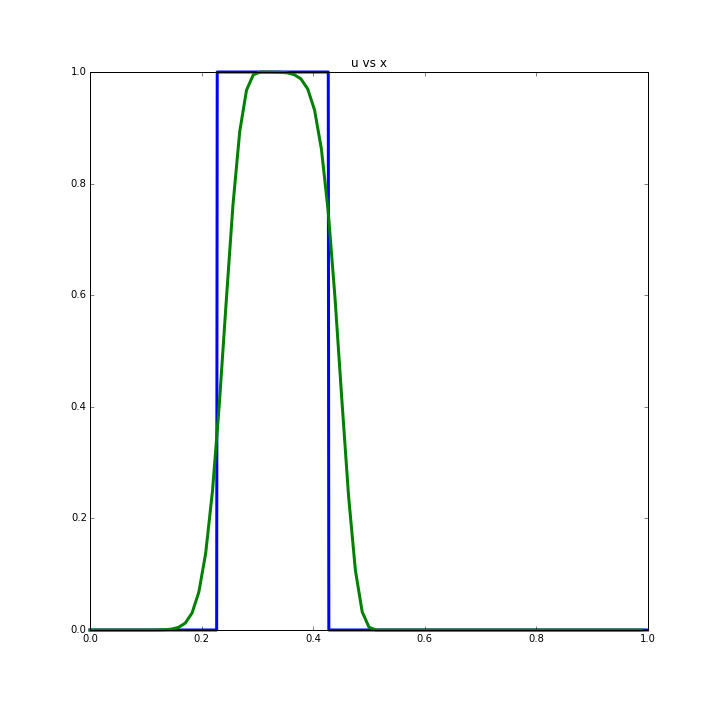
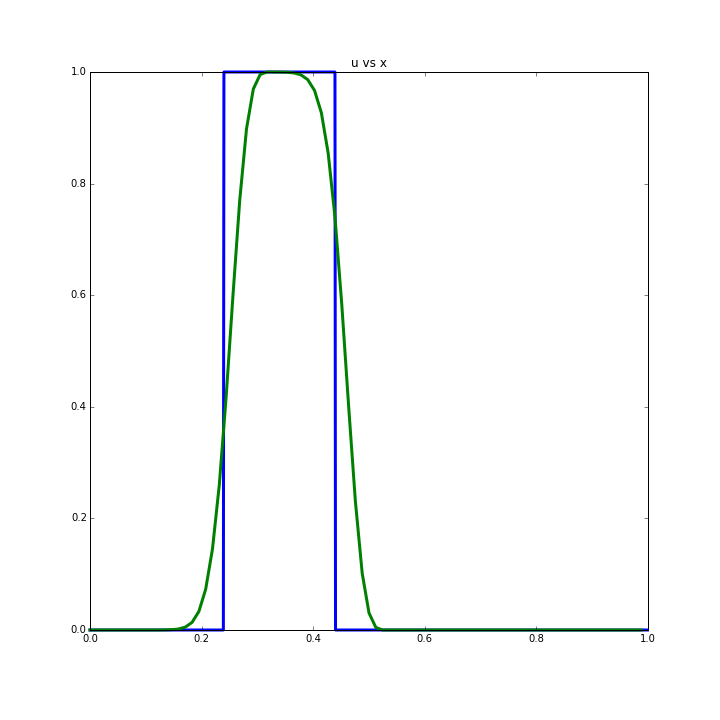
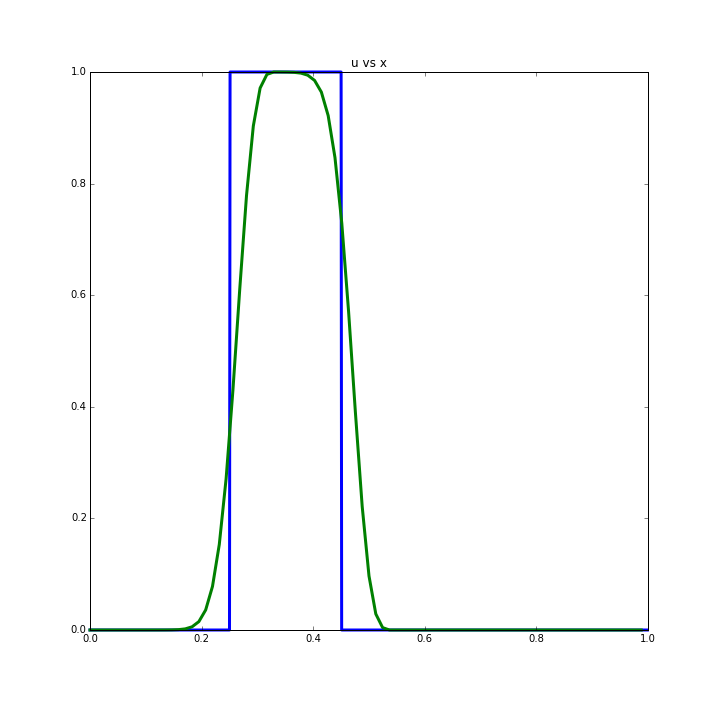
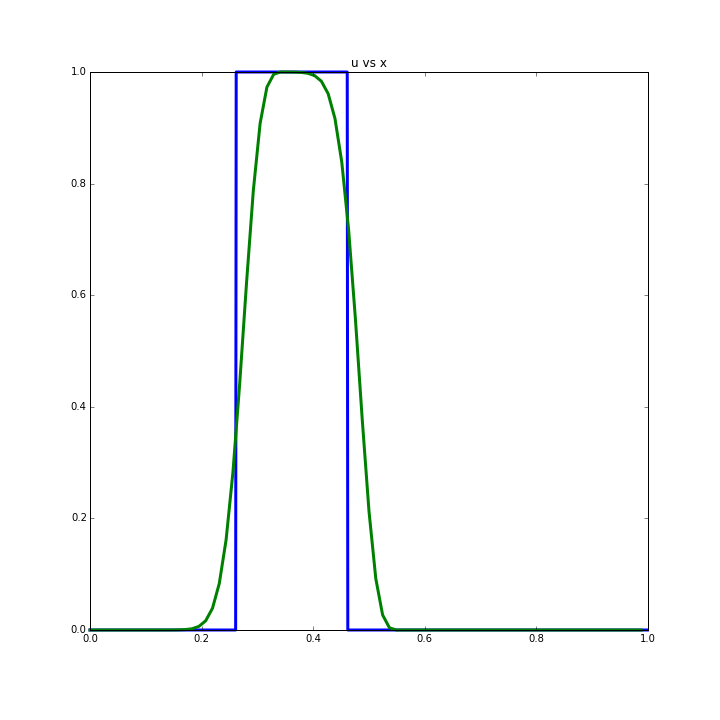
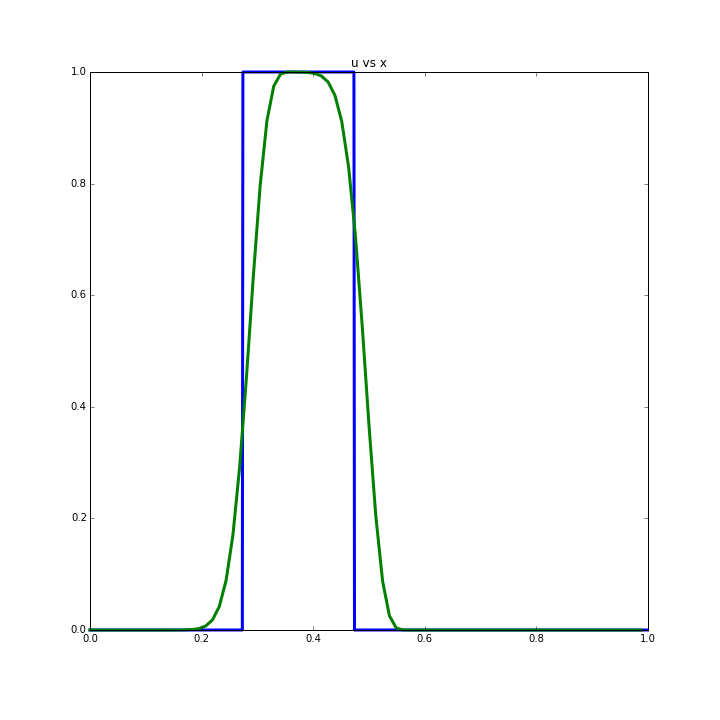
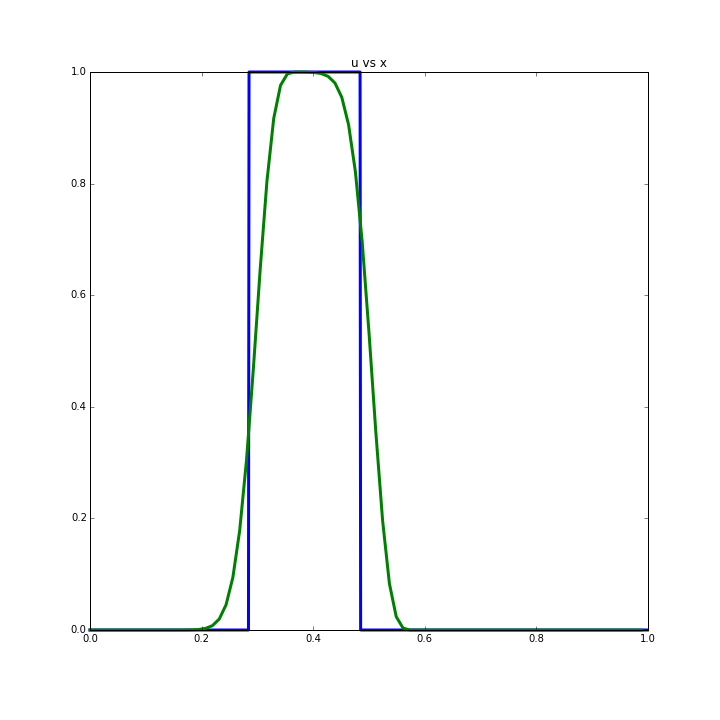
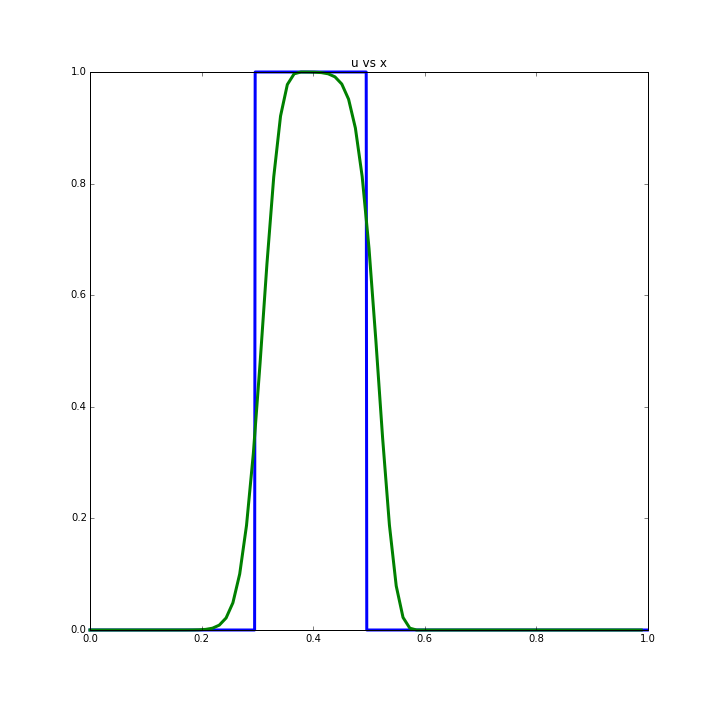
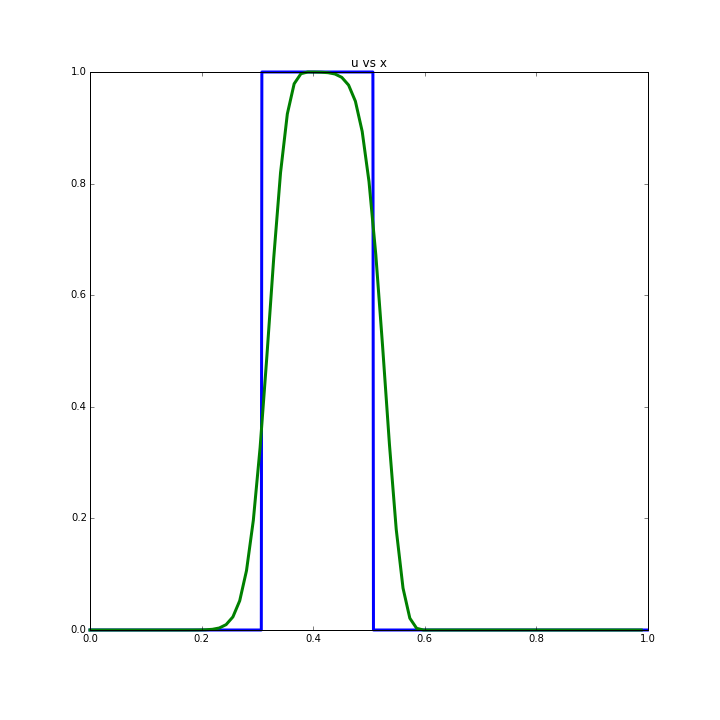
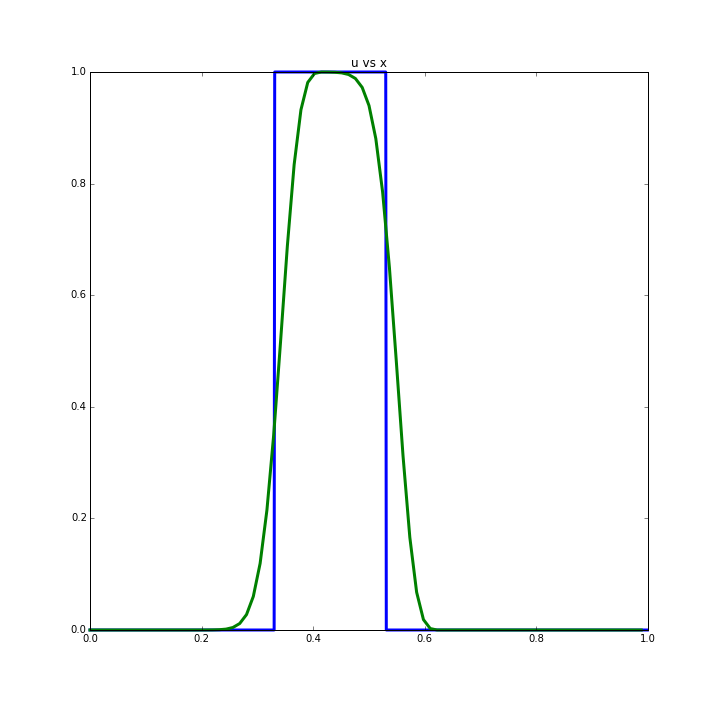
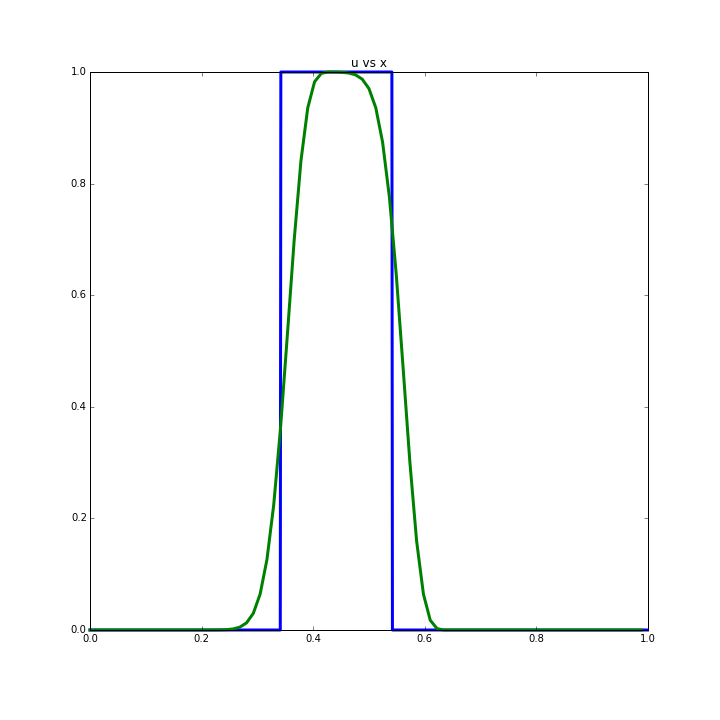
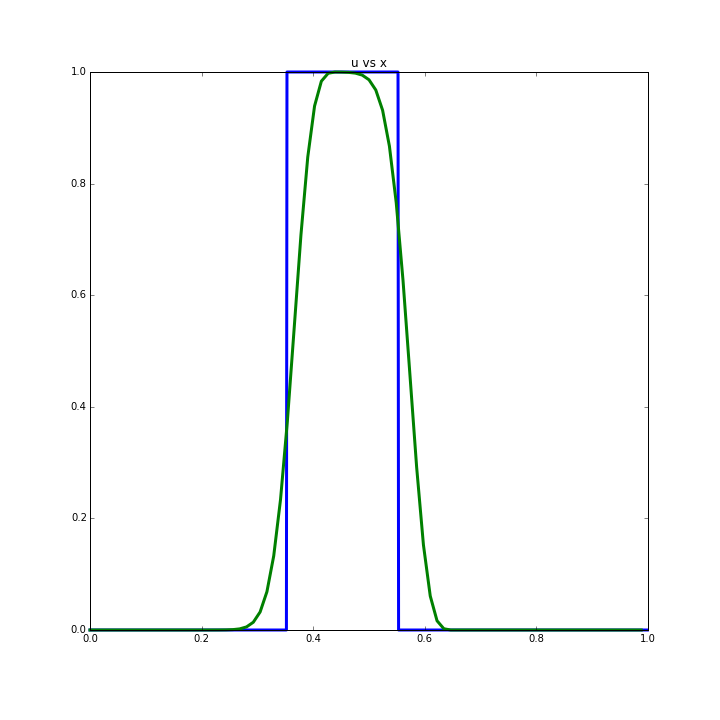
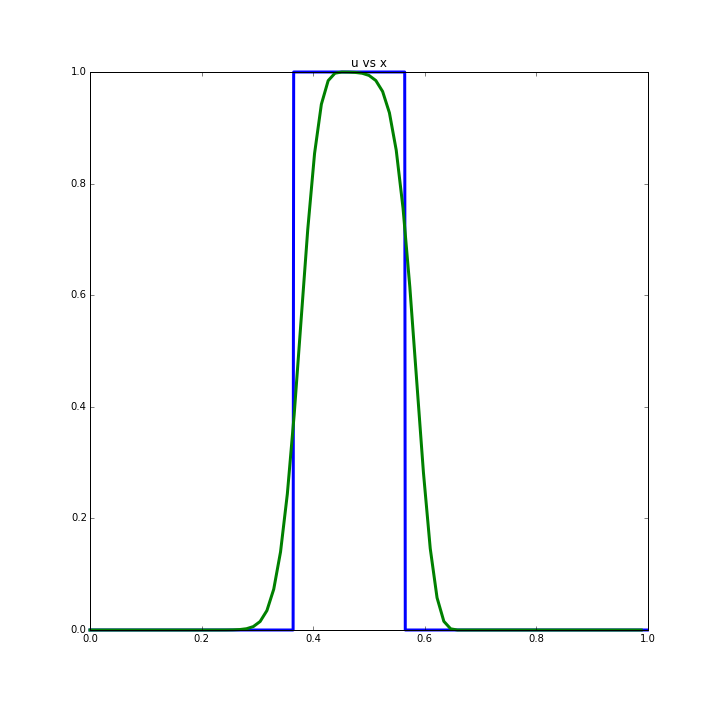
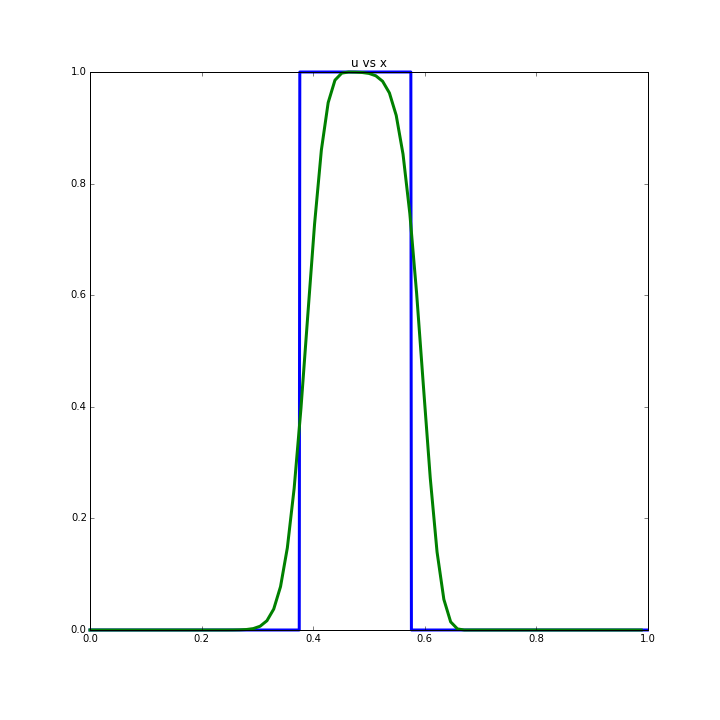

In [8]:
import time
#from IPython.display import clear_output, display

method = 'FTBS'
plotit = True
u = f(x)
if plotit:
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    ax.set_title('u vs x')
    line1, = ax.plot(x, u, lw=3, clip_on=False)
    line2, = ax.plot(x, u, lw=3, clip_on=False)
    def init():
        line1.set_data([], [])
        line2.set_data([], [])
        
def timestepper(n):
    
    if method == 'FTBS':
        u[J] = u[J] - lmbda * (u[J] - u[Jm1])  # FTBS
            
    if method == 'FTFS':
        u[J] = u[J] - lmbda * (u[Jp1] - u[J])  # FTFS
        
    if method == 'FTCS':
        u[J] = u[J] - lmbda * (1.0 / 2.0) * (u[Jp1] - u[Jm1])  # FTCS
    
    
    uex = f((xx - c * (n+1) * dt) % 1.0)
        
    line1.set_data(xx, uex)
    line2.set_data(x, u)
    
    return line1, line2

from JSAnimation import IPython_display
from matplotlib import animation
animation.FuncAnimation(fig, timestepper, init_func=init, frames=nt, interval=20, blit=True)

Step 6: Check the error
===

In [27]:
uex = f((x - c * (n+1) * dt) % 1.0)
error = u - uex
l2err = np.sqrt(dx * np.sum(error**2))
print(l2err)

0.130886225059


In [9]:
import JSAnimation

In [11]:
JSAnimation.__doc__